In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import *
import seaborn as sns
from matplotlib import rcParams
import matplotlib as mpl
import datetime as dt

In [3]:
#conda update --force-reinstall pandas

In [4]:
#Import data file
df = pd.read_csv('Input File/201912-citibike-tripdata.csv')

In [5]:
#Check data frame
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,602,2019-12-01 00:00:05.5640,2019-12-01 00:10:07.8180,3382,Carroll St & Smith St,40.680611,-73.994758,3304,6 Ave & 9 St,40.668127,-73.983776,41932,Subscriber,1970,1
1,1206,2019-12-01 00:00:10.9630,2019-12-01 00:20:17.8820,362,Broadway & W 37 St,40.751726,-73.987535,500,Broadway & W 51 St,40.762288,-73.983362,18869,Customer,1999,1
2,723,2019-12-01 00:00:11.8180,2019-12-01 00:12:14.8310,146,Hudson St & Reade St,40.716250,-74.009106,238,Bank St & Washington St,40.736197,-74.008592,15334,Subscriber,1997,1
3,404,2019-12-01 00:00:12.2200,2019-12-01 00:06:56.8860,3834,Irving Ave & Halsey St,40.694670,-73.906630,3827,Halsey St & Broadway,40.685650,-73.915640,41692,Customer,1995,1
4,1059,2019-12-01 00:00:14.7230,2019-12-01 00:17:54.1860,500,Broadway & W 51 St,40.762288,-73.983362,3323,W 106 St & Central Park West,40.798186,-73.960591,40156,Subscriber,1961,1


In [6]:
split=df.starttime.str.split(' ', expand=True)
df['start_date']=split[0]
df['start_time']=split[1]
split2=df.stoptime.str.split(' ', expand=True)
df['end_date']=split2[0]
df['end_time']=split2[1]

In [7]:
#Check percentage of missing data in the dataset
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data(df)

,Total,Percent
end_time,0,0.0
end station name,0,0.0
starttime,0,0.0
stoptime,0,0.0
start station id,0,0.0
start station name,0,0.0
start station latitude,0,0.0
start station longitude,0,0.0
end station id,0,0.0
end station latitude,0,0.0


In [8]:
#Drop missing values 
df.dropna(inplace = True)

In [9]:
#Convert variables to the correct data format types
df['starttime'] = to_datetime(df['starttime'])
df['stoptime'] = to_datetime(df['stoptime'])
df['start station name'] = df['start station name'].astype('category')
df['end station name'] = df['end station name'].astype('category')
df['usertype'] = df['usertype'].astype('category')
df['gender'] = df['gender'].astype('category')
round(df.describe())


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year
count,955210.0,955210.0,955210.0,955210.0,955210.0,955210.0,955210.0,955210.0,955210.0
mean,831.0,1667.0,41.0,-74.0,1647.0,41.0,-74.0,32916.0,1979.0
std,10786.0,1493.0,0.0,0.0,1491.0,0.0,0.0,7997.0,13.0
min,61.0,72.0,41.0,-74.0,72.0,41.0,-74.0,14529.0,1885.0
25%,320.0,380.0,41.0,-74.0,379.0,41.0,-74.0,28716.0,1969.0
50%,522.0,509.0,41.0,-74.0,507.0,41.0,-74.0,34101.0,1982.0
75%,876.0,3311.0,41.0,-74.0,3307.0,41.0,-74.0,39839.0,1990.0
max,3304262.0,3911.0,41.0,-74.0,3911.0,41.0,-74.0,42046.0,2003.0


In [10]:
#Check the data format to ensure changes have been made per above
df.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name               category
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                 category
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                         category
birth year                          int64
gender                           category
start_date                         object
start_time                         object
end_date                           object
end_time                           object
dtype: object

In [11]:
#Rename columns in data frame
df.columns = [j.replace(' ', '_') for j in df.columns]

In [12]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_date,start_time,end_date,end_time
0,602,2019-12-01 00:00:05.564,2019-12-01 00:10:07.818,3382,Carroll St & Smith St,40.680611,-73.994758,3304,6 Ave & 9 St,40.668127,-73.983776,41932,Subscriber,1970,1,2019-12-01,00:00:05.5640,2019-12-01,00:10:07.8180
1,1206,2019-12-01 00:00:10.963,2019-12-01 00:20:17.882,362,Broadway & W 37 St,40.751726,-73.987535,500,Broadway & W 51 St,40.762288,-73.983362,18869,Customer,1999,1,2019-12-01,00:00:10.9630,2019-12-01,00:20:17.8820
2,723,2019-12-01 00:00:11.818,2019-12-01 00:12:14.831,146,Hudson St & Reade St,40.716250,-74.009106,238,Bank St & Washington St,40.736197,-74.008592,15334,Subscriber,1997,1,2019-12-01,00:00:11.8180,2019-12-01,00:12:14.8310
3,404,2019-12-01 00:00:12.220,2019-12-01 00:06:56.886,3834,Irving Ave & Halsey St,40.694670,-73.906630,3827,Halsey St & Broadway,40.685650,-73.915640,41692,Customer,1995,1,2019-12-01,00:00:12.2200,2019-12-01,00:06:56.8860
4,1059,2019-12-01 00:00:14.723,2019-12-01 00:17:54.186,500,Broadway & W 51 St,40.762288,-73.983362,3323,W 106 St & Central Park West,40.798186,-73.960591,40156,Subscriber,1961,1,2019-12-01,00:00:14.7230,2019-12-01,00:17:54.1860


In [13]:
#Filter data to a specific week in December

start_date = '15-12-2019'
end_date = '22-12-2019'
mask = (df['starttime'] >= start_date) & (df['starttime'] <= end_date)
df_filtered = df.loc[mask]
df_filtered

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_date,start_time,end_date,end_time
487263,1070,2019-12-15 00:00:01.529,2019-12-15 00:17:51.919,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,2006,Central Park S & 6 Ave,40.765909,-73.976342,35274,Subscriber,1988,2,2019-12-15,00:00:01.5290,2019-12-15,00:17:51.9190
487264,1756,2019-12-15 00:00:10.100,2019-12-15 00:29:27.096,471,Grand St & Havemeyer St,40.712868,-73.956981,3846,Central Ave & Himrod St,40.696760,-73.923020,28405,Customer,1989,2,2019-12-15,00:00:10.1000,2019-12-15,00:29:27.0960
487265,230,2019-12-15 00:00:12.226,2019-12-15 00:04:03.125,479,9 Ave & W 45 St,40.760193,-73.991255,478,11 Ave & W 41 St,40.760301,-73.998842,34295,Subscriber,1988,1,2019-12-15,00:00:12.2260,2019-12-15,00:04:03.1250
487266,686,2019-12-15 00:00:16.385,2019-12-15 00:11:42.665,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,3544,Underhill Ave & Pacific St,40.680484,-73.964680,42026,Subscriber,1989,2,2019-12-15,00:00:16.3850,2019-12-15,00:11:42.6650
487267,1770,2019-12-15 00:00:21.888,2019-12-15 00:29:52.244,2000,Front St & Washington St,40.702551,-73.989402,3100,Nassau Ave & Newell St,40.724813,-73.947526,40756,Customer,1980,1,2019-12-15,00:00:21.8880,2019-12-15,00:29:52.2440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707969,733,2019-12-21 23:58:45.517,2019-12-22 00:10:59.260,3092,Berry St & N 8 St,40.719009,-73.958525,3117,Franklin St & Dupont St,40.735640,-73.958660,14788,Subscriber,1965,1,2019-12-21,23:58:45.5170,2019-12-22,00:10:59.2600
707970,227,2019-12-21 23:59:26.487,2019-12-22 00:03:13.944,3507,Park Ave & E 124 St,40.804555,-73.939686,3510,Adam Clayton Powell Blvd & W 123 St,40.807832,-73.949373,38289,Subscriber,1968,2,2019-12-21,23:59:26.4870,2019-12-22,00:03:13.9440
707971,163,2019-12-21 23:59:26.862,2019-12-22 00:02:10.072,3110,Meserole Ave & Manhattan Ave,40.727086,-73.952991,3115,India St & Manhattan Ave,40.732322,-73.955086,28182,Subscriber,1986,1,2019-12-21,23:59:26.8620,2019-12-22,00:02:10.0720
707972,516,2019-12-21 23:59:30.936,2019-12-22 00:08:07.128,3472,W 15 St & 10 Ave,40.742754,-74.007474,514,12 Ave & W 40 St,40.760875,-74.002777,41753,Subscriber,1984,1,2019-12-21,23:59:30.9360,2019-12-22,00:08:07.1280


In [14]:
#Exclude bike trips that record trip duration as <90s and which start station & end station is the same. 
#This takes care of faulty bikes that users may have picked up, then realised that they were faulty and returned them back to the same station, typically within 90s.
df = df_filtered.drop(df_filtered.index[(df_filtered['tripduration'] < 90) & 
                          (df_filtered['start_station_latitude'] == df_filtered['start_station_latitude'])])

In [15]:
#Add Minutes column for Trip Duration
df['tripduration_minutes'] = df['tripduration']/60
#For Visual purposes, rounded
df['tripduration_minutes'] = round(df['tripduration_minutes'])
df['tripduration_minutes'] = df['tripduration_minutes'].astype(int)

df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes
487263,1070,2019-12-15 00:00:01.529,2019-12-15 00:17:51.919,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,2006,Central Park S & 6 Ave,40.765909,-73.976342,35274,Subscriber,1988,2,2019-12-15,00:00:01.5290,2019-12-15,00:17:51.9190,18
487264,1756,2019-12-15 00:00:10.100,2019-12-15 00:29:27.096,471,Grand St & Havemeyer St,40.712868,-73.956981,3846,Central Ave & Himrod St,40.696760,-73.923020,28405,Customer,1989,2,2019-12-15,00:00:10.1000,2019-12-15,00:29:27.0960,29
487265,230,2019-12-15 00:00:12.226,2019-12-15 00:04:03.125,479,9 Ave & W 45 St,40.760193,-73.991255,478,11 Ave & W 41 St,40.760301,-73.998842,34295,Subscriber,1988,1,2019-12-15,00:00:12.2260,2019-12-15,00:04:03.1250,4
487266,686,2019-12-15 00:00:16.385,2019-12-15 00:11:42.665,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,3544,Underhill Ave & Pacific St,40.680484,-73.964680,42026,Subscriber,1989,2,2019-12-15,00:00:16.3850,2019-12-15,00:11:42.6650,11
487267,1770,2019-12-15 00:00:21.888,2019-12-15 00:29:52.244,2000,Front St & Washington St,40.702551,-73.989402,3100,Nassau Ave & Newell St,40.724813,-73.947526,40756,Customer,1980,1,2019-12-15,00:00:21.8880,2019-12-15,00:29:52.2440,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707969,733,2019-12-21 23:58:45.517,2019-12-22 00:10:59.260,3092,Berry St & N 8 St,40.719009,-73.958525,3117,Franklin St & Dupont St,40.735640,-73.958660,14788,Subscriber,1965,1,2019-12-21,23:58:45.5170,2019-12-22,00:10:59.2600,12
707970,227,2019-12-21 23:59:26.487,2019-12-22 00:03:13.944,3507,Park Ave & E 124 St,40.804555,-73.939686,3510,Adam Clayton Powell Blvd & W 123 St,40.807832,-73.949373,38289,Subscriber,1968,2,2019-12-21,23:59:26.4870,2019-12-22,00:03:13.9440,4
707971,163,2019-12-21 23:59:26.862,2019-12-22 00:02:10.072,3110,Meserole Ave & Manhattan Ave,40.727086,-73.952991,3115,India St & Manhattan Ave,40.732322,-73.955086,28182,Subscriber,1986,1,2019-12-21,23:59:26.8620,2019-12-22,00:02:10.0720,3
707972,516,2019-12-21 23:59:30.936,2019-12-22 00:08:07.128,3472,W 15 St & 10 Ave,40.742754,-74.007474,514,12 Ave & W 40 St,40.760875,-74.002777,41753,Subscriber,1984,1,2019-12-21,23:59:30.9360,2019-12-22,00:08:07.1280,9


Text(0, 0.5, 'Trip Counts')

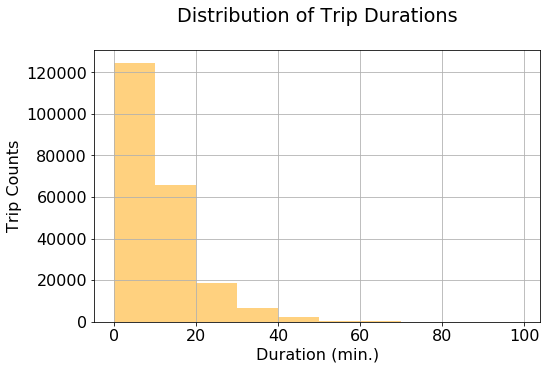

In [16]:
# Plot the distribution of trip durations
plt.rcParams.update({'font.size': 16})
df['tripduration_minutes'].hist(figsize = (8,5), bins=[0,10,20,30,40,50,60,70,80,90,99], alpha = 0.5, color = 'orange')
plt.title('Distribution of Trip Durations\n')
plt.xlabel('Duration (min.)')
plt.ylabel('Trip Counts')

In [17]:
#Exclude bike trips that register trip duration longer than 60 minutes. 
#As seen from above histogram, very few trips register duration longer than 60 minutes. 
#Any trip which lasts longer than 1 hours 3600 seconds probably indicates a stolen bike, an anomaly, or incorrect docking of the bike.
df = df.drop(df.index[(df['tripduration_minutes'] > 60)])
df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes
487263,1070,2019-12-15 00:00:01.529,2019-12-15 00:17:51.919,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,2006,Central Park S & 6 Ave,40.765909,-73.976342,35274,Subscriber,1988,2,2019-12-15,00:00:01.5290,2019-12-15,00:17:51.9190,18
487264,1756,2019-12-15 00:00:10.100,2019-12-15 00:29:27.096,471,Grand St & Havemeyer St,40.712868,-73.956981,3846,Central Ave & Himrod St,40.696760,-73.923020,28405,Customer,1989,2,2019-12-15,00:00:10.1000,2019-12-15,00:29:27.0960,29
487265,230,2019-12-15 00:00:12.226,2019-12-15 00:04:03.125,479,9 Ave & W 45 St,40.760193,-73.991255,478,11 Ave & W 41 St,40.760301,-73.998842,34295,Subscriber,1988,1,2019-12-15,00:00:12.2260,2019-12-15,00:04:03.1250,4
487266,686,2019-12-15 00:00:16.385,2019-12-15 00:11:42.665,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,3544,Underhill Ave & Pacific St,40.680484,-73.964680,42026,Subscriber,1989,2,2019-12-15,00:00:16.3850,2019-12-15,00:11:42.6650,11
487267,1770,2019-12-15 00:00:21.888,2019-12-15 00:29:52.244,2000,Front St & Washington St,40.702551,-73.989402,3100,Nassau Ave & Newell St,40.724813,-73.947526,40756,Customer,1980,1,2019-12-15,00:00:21.8880,2019-12-15,00:29:52.2440,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707969,733,2019-12-21 23:58:45.517,2019-12-22 00:10:59.260,3092,Berry St & N 8 St,40.719009,-73.958525,3117,Franklin St & Dupont St,40.735640,-73.958660,14788,Subscriber,1965,1,2019-12-21,23:58:45.5170,2019-12-22,00:10:59.2600,12
707970,227,2019-12-21 23:59:26.487,2019-12-22 00:03:13.944,3507,Park Ave & E 124 St,40.804555,-73.939686,3510,Adam Clayton Powell Blvd & W 123 St,40.807832,-73.949373,38289,Subscriber,1968,2,2019-12-21,23:59:26.4870,2019-12-22,00:03:13.9440,4
707971,163,2019-12-21 23:59:26.862,2019-12-22 00:02:10.072,3110,Meserole Ave & Manhattan Ave,40.727086,-73.952991,3115,India St & Manhattan Ave,40.732322,-73.955086,28182,Subscriber,1986,1,2019-12-21,23:59:26.8620,2019-12-22,00:02:10.0720,3
707972,516,2019-12-21 23:59:30.936,2019-12-22 00:08:07.128,3472,W 15 St & 10 Ave,40.742754,-74.007474,514,12 Ave & W 40 St,40.760875,-74.002777,41753,Subscriber,1984,1,2019-12-21,23:59:30.9360,2019-12-22,00:08:07.1280,9


In [18]:
#Define type of trips by "Joy Ride" and "Journey"
df['ride_type'] = np.where(df['start_station_id']== df['end_station_id'], 'joy_ride', 'journey')

In [19]:
#Calculate the top 5 popular stations based on the highest number of starts
top5 = pd.DataFrame() 
top5['Station']=df['start_station_name'].value_counts().head().index
top5['Number of Starts']=df['start_station_name'].value_counts().head().values
top5['Station'] = top5['Station'].cat.remove_unused_categories()
top5['Station'] = top5['Station'].astype('object')
#top5.sort_values(by = 'Number of Starts', ascending = False)

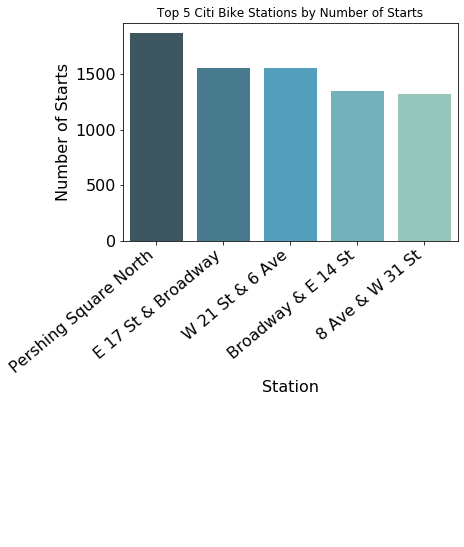

In [20]:
#Plot bar chart for the the Top 5 Stations based on number of starts
ax = sns.barplot('Station', 'Number of Starts', data = top5, palette="GnBu_d")
ax.set_title('Top 5 Citi Bike Stations by Number of Starts', fontsize = 12)
rcParams['figure.figsize'] = 12,7
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha = 'right')
for index, row in top5.iterrows():
    ax.text(index,row['Number of Starts']-4000,row['Number of Starts'], 
            color='white', ha="center", fontsize = 10)
plt.show()

In [21]:
#Add a new column calculating the number of trips between two stations, start and end.
trips_df = df.groupby(['start_station_name','end_station_name']).size().reset_index(name = 'number_of_trips')
trips_df.sort_values('number_of_trips', ascending = False, inplace = True)
trips_df = trips_df.head(10)
trips_df

,start_station_name,end_station_name,number_of_trips
32804,E 7 St & Avenue A,Cooper Square & Astor Pl,109
15032,Broadway & W 60 St,11 Ave & W 59 St,96
27570,E 32 St & Park Ave,E 33 St & 1 Ave,90
59650,W 21 St & 6 Ave,9 Ave & W 22 St,87
1918,11 Ave & W 41 St,8 Ave & W 33 St,77
32007,E 6 St & Avenue B,Cooper Square & Astor Pl,72
20280,Cooper Square & Astor Pl,E 6 St & Avenue B,70
56841,Vesey Pl & River Terrace,North Moore St & Greenwich St,69
58850,W 17 St & 8 Ave,W 20 St & 11 Ave,68
1584,10 Ave & W 28 St,W 26 St & 8 Ave,68


In [22]:
#Add a column to dataframe to indicate the trip details 
trips_df['trip_detail'] = trips_df['start_station_name'].astype(str) + ' to ' + trips_df['end_station_name'].astype(str)
trips_df

,start_station_name,end_station_name,number_of_trips,trip_detail
32804,E 7 St & Avenue A,Cooper Square & Astor Pl,109,E 7 St & Avenue A to Cooper Square & Astor Pl
15032,Broadway & W 60 St,11 Ave & W 59 St,96,Broadway & W 60 St to 11 Ave & W 59 St
27570,E 32 St & Park Ave,E 33 St & 1 Ave,90,E 32 St & Park Ave to E 33 St & 1 Ave
59650,W 21 St & 6 Ave,9 Ave & W 22 St,87,W 21 St & 6 Ave to 9 Ave & W 22 St
1918,11 Ave & W 41 St,8 Ave & W 33 St,77,11 Ave & W 41 St to 8 Ave & W 33 St
32007,E 6 St & Avenue B,Cooper Square & Astor Pl,72,E 6 St & Avenue B to Cooper Square & Astor Pl
20280,Cooper Square & Astor Pl,E 6 St & Avenue B,70,Cooper Square & Astor Pl to E 6 St & Avenue B
56841,Vesey Pl & River Terrace,North Moore St & Greenwich St,69,Vesey Pl & River Terrace to North Moore St & G...
58850,W 17 St & 8 Ave,W 20 St & 11 Ave,68,W 17 St & 8 Ave to W 20 St & 11 Ave
1584,10 Ave & W 28 St,W 26 St & 8 Ave,68,10 Ave & W 28 St to W 26 St & 8 Ave


Text(0, 0.5, 'Trip Detail')

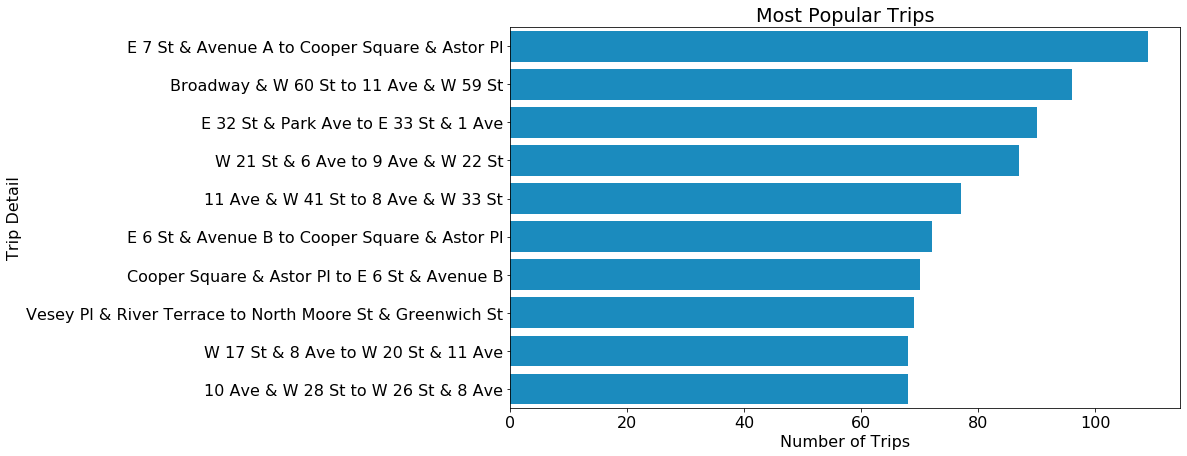

In [23]:
#Plot the most popular trips
plot2 = sns.barplot(data = trips_df
            ,x = 'number_of_trips'
            ,y = 'trip_detail',color = '#0095d9',
            ).set_title('Most Popular Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Trip Detail')

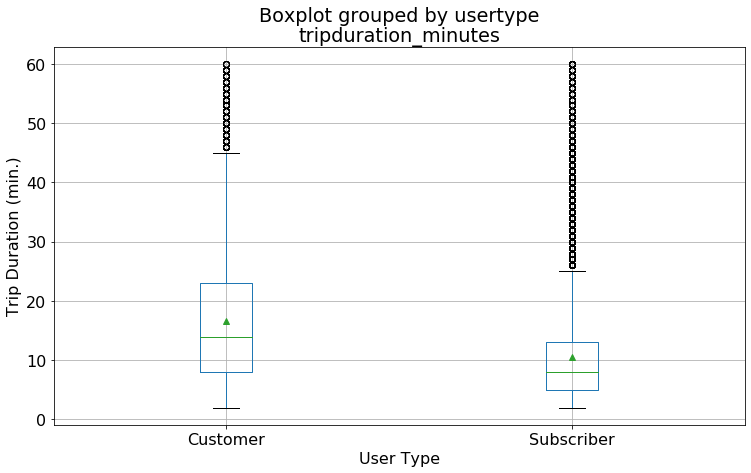

In [24]:
#Plot Box plot of Trip Duration, in minutes by User Type
df.boxplot('tripduration_minutes', by = 'usertype', showmeans=True)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min.)')
plt.show()

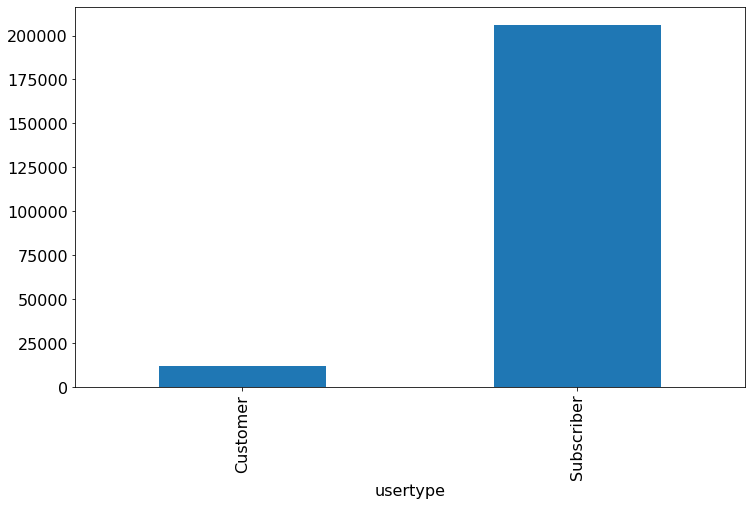

In [25]:
cust_df = df['tripduration_minutes'].groupby(df['usertype']).count()
cust_df.plot.bar()

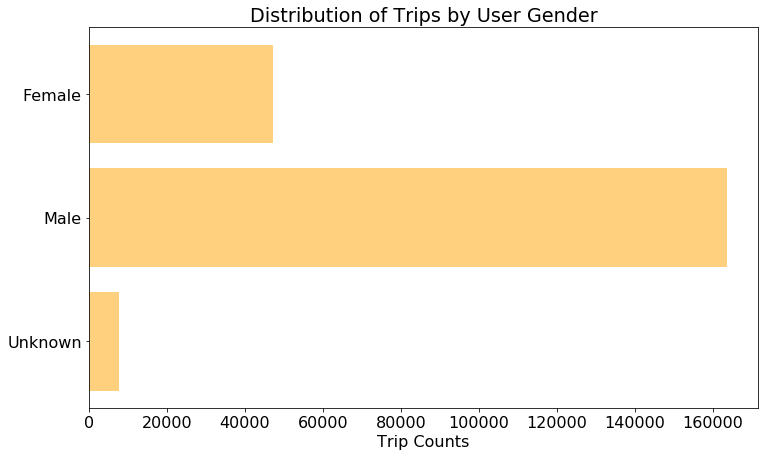

In [26]:
#Plot distribution of trips by gender
genders = ['Unknown', 'Male', 'Female']
y_pos = [0, 1, 2]
trip_counts = df.groupby('gender')['gender'].count()
plt.rcParams.update({'font.size': 16})
plt.barh(y_pos, trip_counts, align = 'center', alpha = 0.5, color = 'orange')
plt.yticks(y_pos, genders)
plt.xlabel('Trip Counts')
plt.title('Distribution of Trips by User Gender')
plt.show()

In [27]:
#Drop unknown gender
#df = df.drop(df.index[(df['gender'] == 0)])

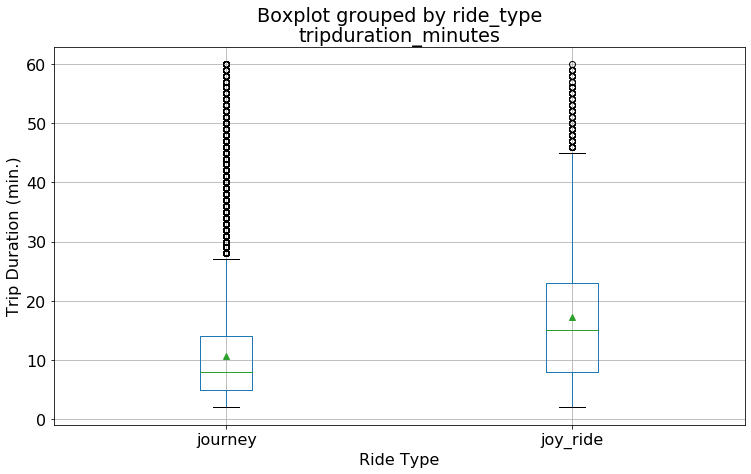

In [28]:
#Plot Box plot of Trip Duration, in minutes by Ride Type 
df.boxplot('tripduration_minutes', by = 'ride_type', showmeans=True)
plt.xlabel('Ride Type')
plt.ylabel('Trip Duration (min.)')
plt.show()

In [29]:
#Calculate Age
df['age'] = 2019 - df['birth_year']
df['age'] = df['age'].astype(int)

Text(0, 0.5, 'Count')

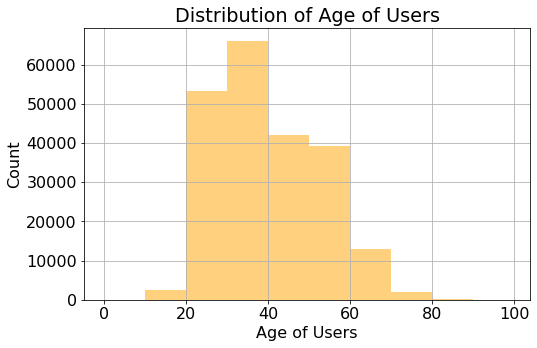

In [30]:
# Plot the distribution of age of users 
plt.rcParams.update({'font.size': 16})
df['age'].hist(figsize = (8,5), bins=[0,10,20,30,40,50,60,70,80,90,99], alpha = 0.5, color = 'orange')
plt.title('Distribution of Age of Users')
plt.xlabel('Age of Users')
plt.ylabel('Count')

In [31]:
# Calculate trip counts per hour on weekdays and weekends
df_sub = df.loc[:, ['tripduration', 'starttime']] # Keep only 'starttime' and 'tripduration' variables
# Index dataframe by 'datetime64' data in 'starttime' variable
df_sub.index = df_sub['starttime']
weekdays = df_sub[df_sub.index.weekday < 6]
weekends = df_sub[df_sub.index.weekday > 5]
weekdays_countsPerHr = weekdays.groupby(weekdays.index.hour).size()
weekends_countsPerHr = weekends.groupby(weekends.index.hour).size()

In [32]:

df['start_date']= pd.to_datetime(df['start_date'])
df['end_date']= pd.to_datetime(df['end_date'])
df['start_weekday']=df['start_date'].dt.weekday_name
rides_day=df['tripduration'].groupby(df['start_weekday']).count().sort_values(ascending=False)
rides_day

start_weekday
Monday       41291
Wednesday    37612
Friday       33869
Sunday       33367
Thursday     29149
Saturday     23951
Tuesday      19131
Name: tripduration, dtype: int64

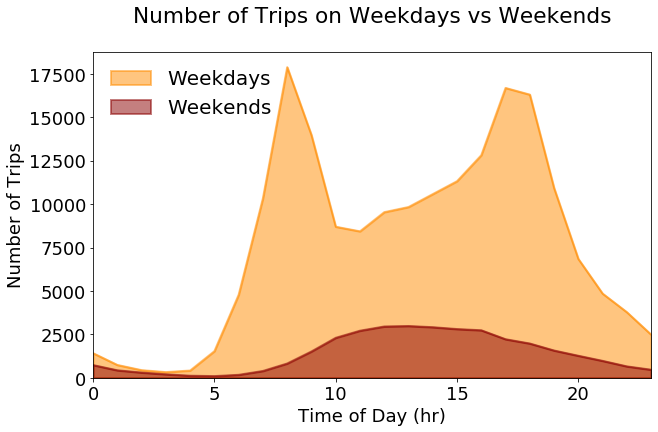

In [33]:
plt.rcParams.update({'font.size': 18, 'legend.fontsize': 20})
weekdays_countsPerHr.plot(kind = 'area', stacked = False, figsize = (10, 6), color = 'darkorange',
                          linewidth = 2, label='Weekdays')

weekends_countsPerHr.plot(kind = 'area', stacked = False, color = 'darkred',
                          linewidth = 2, label='Weekends')

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax = plt.gca()
plt.title('Number of Trips on Weekdays vs Weekends\n')
plt.xlabel('Time of Day (hr)')
plt.ylabel('Number of Trips')
legend = ax.legend(loc='upper left', frameon = False)


/Users/shreyanshshivam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


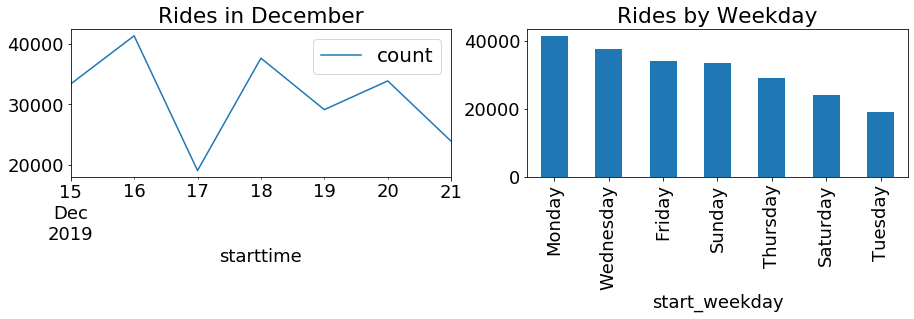

In [34]:
#Plot the number of trips recorded per day over the week
df.index = df['starttime']
countsPerDay = df.starttime.resample('D', how = ['count'])

fig=plt.figure()
ax=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)

countsPerDay.plot(ax=ax, figsize=(15,6),title='Rides in December')
rides_day.plot.bar(ax=ax1, figsize=(15,6),title='Rides by Weekday')

In [35]:
#Map trip count and duration according to start station
start_station = df.iloc[:,[3, 4, 5, 6]]
start_station.index = start_station['start_station_id']
start_station.head()

,start_station_id,start_station_name,start_station_latitude,start_station_longitude
start_station_id,,,,
3171,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673
471,471,Grand St & Havemeyer St,40.712868,-73.956981
479,479,9 Ave & W 45 St,40.760193,-73.991255
366,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896
2000,2000,Front St & Washington St,40.702551,-73.989402


In [36]:
start_station = start_station.drop_duplicates()
start_station.shape

(904, 4)

In [37]:
# Add trip counts and mean trip duration for each start station
count_start_station = df.groupby('start_station_id')['start_station_id'].count()
mean_start_station = df.groupby('start_station_id')['tripduration_minutes'].mean()
start_station['trip count'] = count_start_station
start_station['mean duration'] = mean_start_station
start_station.head()

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,trip count,mean duration
start_station_id,,,,,,
3171,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,385,11.919481
471,471,Grand St & Havemeyer St,40.712868,-73.956981,203,11.635468
479,479,9 Ave & W 45 St,40.760193,-73.991255,677,10.740030
366,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,346,9.523121
2000,2000,Front St & Washington St,40.702551,-73.989402,251,14.270916


In [38]:
df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 00:00:01.529,1070,2019-12-15 00:00:01.529,2019-12-15 00:17:51.919,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,2006,Central Park S & 6 Ave,40.765909,...,1988,2,2019-12-15,00:00:01.5290,2019-12-15,00:17:51.9190,18,journey,31,Sunday
2019-12-15 00:00:10.100,1756,2019-12-15 00:00:10.100,2019-12-15 00:29:27.096,471,Grand St & Havemeyer St,40.712868,-73.956981,3846,Central Ave & Himrod St,40.696760,...,1989,2,2019-12-15,00:00:10.1000,2019-12-15,00:29:27.0960,29,journey,30,Sunday
2019-12-15 00:00:12.226,230,2019-12-15 00:00:12.226,2019-12-15 00:04:03.125,479,9 Ave & W 45 St,40.760193,-73.991255,478,11 Ave & W 41 St,40.760301,...,1988,1,2019-12-15,00:00:12.2260,2019-12-15,00:04:03.1250,4,journey,31,Sunday
2019-12-15 00:00:16.385,686,2019-12-15 00:00:16.385,2019-12-15 00:11:42.665,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,3544,Underhill Ave & Pacific St,40.680484,...,1989,2,2019-12-15,00:00:16.3850,2019-12-15,00:11:42.6650,11,journey,30,Sunday
2019-12-15 00:00:21.888,1770,2019-12-15 00:00:21.888,2019-12-15 00:29:52.244,2000,Front St & Washington St,40.702551,-73.989402,3100,Nassau Ave & Newell St,40.724813,...,1980,1,2019-12-15,00:00:21.8880,2019-12-15,00:29:52.2440,30,journey,39,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-21 23:58:45.517,733,2019-12-21 23:58:45.517,2019-12-22 00:10:59.260,3092,Berry St & N 8 St,40.719009,-73.958525,3117,Franklin St & Dupont St,40.735640,...,1965,1,2019-12-21,23:58:45.5170,2019-12-22,00:10:59.2600,12,journey,54,Saturday
2019-12-21 23:59:26.487,227,2019-12-21 23:59:26.487,2019-12-22 00:03:13.944,3507,Park Ave & E 124 St,40.804555,-73.939686,3510,Adam Clayton Powell Blvd & W 123 St,40.807832,...,1968,2,2019-12-21,23:59:26.4870,2019-12-22,00:03:13.9440,4,journey,51,Saturday
2019-12-21 23:59:26.862,163,2019-12-21 23:59:26.862,2019-12-22 00:02:10.072,3110,Meserole Ave & Manhattan Ave,40.727086,-73.952991,3115,India St & Manhattan Ave,40.732322,...,1986,1,2019-12-21,23:59:26.8620,2019-12-22,00:02:10.0720,3,journey,33,Saturday


### Folium Maps for Observing Intensity of Trips through the Day

In [39]:
pip install folium

You should consider upgrading via the '/Users/shreyanshshivam/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [40]:
import folium
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm

norm = Normalize(start_station['trip count'].min(), start_station['trip count'].max())
# Get dark tileset from CartoBD (https://cartodb.com/basemaps)
tileset = r'http://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png'
start_station_map = folium.Map(location = [40.74, -73.99], width = 400, height = 600,
                             tiles = tileset,
                             attr = '&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>',
                             zoom_start = 12)

for index, row in start_station.iterrows():
    color = rgb2hex(cm.YlOrRd(norm(row['trip count'])))
    folium.CircleMarker(location = [row['start_station_latitude'],
                                              row['start_station_longitude']],
                                  popup = row['start_station_name'],
                                  radius = row['mean duration'] / 10,
                                  color=color).add_to(start_station_map)
# Create the final html document
start_station_map.save('Folium_Output/start_station_map.html')

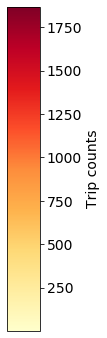

In [41]:
# Make a color scale bar
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (.5, 30))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

# Set the colormap and norm to correspond to the data
cmap = mpl.cm.YlOrRd
norm = mpl.colors.Normalize(start_station['trip count'].min(), start_station['trip count'].max())

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap = cmap, norm = norm, orientation = 'vertical')
cb1.set_label('Trip counts')

# Save as file
from pylab import *
savefig('Folium_Output/color_scale_start_station.png', bbox_inches = 'tight')

In [42]:
from IPython.display import IFrame
IFrame('Folium_Output/start_station_map.html', width = 400, height = 600)

In [43]:
#Map trip count and duration according to start station
end_station = df.iloc[:, [7, 8, 9, 10]]
end_station.index = end_station['end_station_id']
end_station.head()

,end_station_id,end_station_name,end_station_latitude,end_station_longitude
end_station_id,,,,
2006,2006,Central Park S & 6 Ave,40.765909,-73.976342
3846,3846,Central Ave & Himrod St,40.696760,-73.923020
478,478,11 Ave & W 41 St,40.760301,-73.998842
3544,3544,Underhill Ave & Pacific St,40.680484,-73.964680
3100,3100,Nassau Ave & Newell St,40.724813,-73.947526


In [44]:
end_station = end_station.drop_duplicates()
end_station.shape

(904, 4)

In [45]:
# Add trip counts and mean trip duration for each end station
count_end_station = df.groupby('end_station_id')['end_station_id'].count()
mean_end_station = df.groupby('end_station_id')['tripduration_minutes'].mean()
end_station['trip count'] = count_end_station
end_station['mean duration'] = mean_end_station
end_station.head()

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip count,mean duration
end_station_id,,,,,,
2006,2006,Central Park S & 6 Ave,40.765909,-73.976342,489,15.541922
3846,3846,Central Ave & Himrod St,40.696760,-73.923020,22,15.681818
478,478,11 Ave & W 41 St,40.760301,-73.998842,700,10.861429
3544,3544,Underhill Ave & Pacific St,40.680484,-73.964680,114,9.175439
3100,3100,Nassau Ave & Newell St,40.724813,-73.947526,176,10.607955


In [46]:
import folium
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm

norm = Normalize(end_station['trip count'].min(), end_station['trip count'].max())
# Get dark tileset from CartoBD (https://cartodb.com/basemaps)
tileset = r'http://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png'
end_station_map = folium.Map(location = [40.74, -73.99], width = 400, height = 600,
                             tiles = tileset,
                             attr = '&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>',
                             zoom_start = 12)

for index, row in end_station.iterrows():
    color = rgb2hex(cm.YlOrRd(norm(row['trip count'])))
    folium.CircleMarker(location = [row['end_station_latitude'],
                                              row['end_station_longitude']],
                                  popup = row['end_station_name'],
                                  radius = row['mean duration'] / 10,
                                  color = color, line_color = color).add_to(end_station_map)

end_station_map.save('Folium_Output/end_station_map.html')


In [47]:
from IPython.display import IFrame
IFrame('Folium_Output/end_station_map.html', width = 400, height = 600)

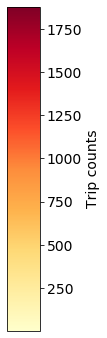

In [48]:
# Make a color scale bar
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (.5, 30))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

# Set the colormap and norm to correspond to the data
cmap = mpl.cm.YlOrRd
norm = mpl.colors.Normalize(end_station['trip count'].min(), end_station['trip count'].max())

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap = cmap, norm = norm, orientation = 'vertical')
cb1.set_label('Trip counts')

# Save as file
from pylab import *
savefig('Folium_Output/color_scale_end_station.png', bbox_inches = 'tight')

In [49]:
#Show Hourly changes in start station use
# Index by 'datetime64' data in 'starttime' variable and get subset of weekdays
df.index = df['starttime']
weekdays = df[df.index.weekday < 6]
weekdays = weekdays.loc[weekdays.tripduration < 3600,:]

In [50]:
start_station = weekdays.iloc[:,[3, 4, 5, 6]]
start_station.index = start_station['start_station_id']
start_station = start_station.drop_duplicates()
start_station.shape

(903, 4)

In [51]:
# Loop through hourly subsets of the 'weekdays' dataFrame
# Calculate trip counts and mean duration for each station
# Add results to complete dataFrame and move on to next iteration
print('Calculating trip attributes for hourly subset:')
whole_day = pd.DataFrame()
for hour in range(24):
    print('... ' + str(hour) + ' hrs')
    subset = weekdays.loc[weekdays.starttime.dt.hour == hour,:]
    
    trip_count = subset.groupby('start_station_id')['start_station_id'].count()
    mean_duration = subset.groupby('start_station_id')['tripduration_minutes'].mean()
    
    start_station['trip count'] = trip_count
    start_station['mean duration'] = mean_duration
    start_station['hour'] = hour # Collect hour for easy subsetting below
    
    whole_day = pd.concat([whole_day, start_station], axis=0)

Calculating trip attributes for hourly subset:
... 0 hrs
... 1 hrs
... 2 hrs
... 3 hrs
... 4 hrs
... 5 hrs
... 6 hrs
... 7 hrs
... 8 hrs
... 9 hrs
... 10 hrs
... 11 hrs
... 12 hrs
... 13 hrs
... 14 hrs
... 15 hrs
... 16 hrs
... 17 hrs
... 18 hrs
... 19 hrs
... 20 hrs
... 21 hrs
... 22 hrs
... 23 hrs


Text(0, 0.5, '')

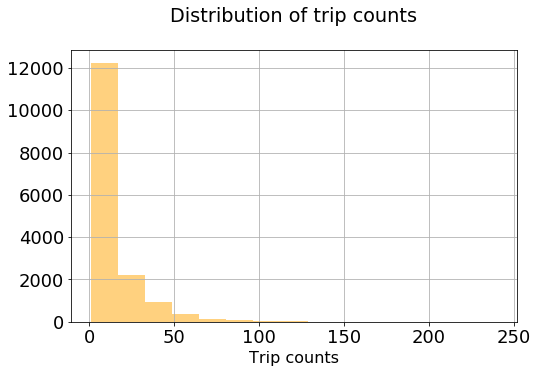

In [52]:
plt.rcParams.update({'font.size': 16})
whole_day['trip count'].hist(figsize = (8,5), bins = 15, alpha = 0.5, color = 'orange')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax = plt.gca()
#ax.set_axis_bgcolor('white')
plt.title('Distribution of trip counts\n')
plt.xlabel('Trip counts')
plt.ylabel('')

In [53]:
trip_count_rank = whole_day.sort_values(by='trip count', ascending = False)
trip_count_rank.head(20)

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,trip count,mean duration,hour
start_station_id,,,,,,,
519,519,Pershing Square North,40.751873,-73.977706,240.0,10.595833,8
359,359,E 47 St & Park Ave,40.755103,-73.974987,216.0,13.305556,17
3255,3255,8 Ave & W 31 St,40.750585,-73.994685,208.0,11.264423,7
3255,3255,8 Ave & W 31 St,40.750585,-73.994685,192.0,11.348958,6
402,402,Broadway & E 22 St,40.740343,-73.989551,191.0,9.047120,18
519,519,Pershing Square North,40.751873,-73.977706,184.0,13.141304,18
519,519,Pershing Square North,40.751873,-73.977706,182.0,10.648352,9
519,519,Pershing Square North,40.751873,-73.977706,176.0,13.863636,17
519,519,Pershing Square North,40.751873,-73.977706,173.0,11.641618,7


In [54]:
df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 00:00:01.529,1070,2019-12-15 00:00:01.529,2019-12-15 00:17:51.919,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,2006,Central Park S & 6 Ave,40.765909,...,1988,2,2019-12-15,00:00:01.5290,2019-12-15,00:17:51.9190,18,journey,31,Sunday
2019-12-15 00:00:10.100,1756,2019-12-15 00:00:10.100,2019-12-15 00:29:27.096,471,Grand St & Havemeyer St,40.712868,-73.956981,3846,Central Ave & Himrod St,40.696760,...,1989,2,2019-12-15,00:00:10.1000,2019-12-15,00:29:27.0960,29,journey,30,Sunday
2019-12-15 00:00:12.226,230,2019-12-15 00:00:12.226,2019-12-15 00:04:03.125,479,9 Ave & W 45 St,40.760193,-73.991255,478,11 Ave & W 41 St,40.760301,...,1988,1,2019-12-15,00:00:12.2260,2019-12-15,00:04:03.1250,4,journey,31,Sunday
2019-12-15 00:00:16.385,686,2019-12-15 00:00:16.385,2019-12-15 00:11:42.665,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,3544,Underhill Ave & Pacific St,40.680484,...,1989,2,2019-12-15,00:00:16.3850,2019-12-15,00:11:42.6650,11,journey,30,Sunday
2019-12-15 00:00:21.888,1770,2019-12-15 00:00:21.888,2019-12-15 00:29:52.244,2000,Front St & Washington St,40.702551,-73.989402,3100,Nassau Ave & Newell St,40.724813,...,1980,1,2019-12-15,00:00:21.8880,2019-12-15,00:29:52.2440,30,journey,39,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-21 23:58:45.517,733,2019-12-21 23:58:45.517,2019-12-22 00:10:59.260,3092,Berry St & N 8 St,40.719009,-73.958525,3117,Franklin St & Dupont St,40.735640,...,1965,1,2019-12-21,23:58:45.5170,2019-12-22,00:10:59.2600,12,journey,54,Saturday
2019-12-21 23:59:26.487,227,2019-12-21 23:59:26.487,2019-12-22 00:03:13.944,3507,Park Ave & E 124 St,40.804555,-73.939686,3510,Adam Clayton Powell Blvd & W 123 St,40.807832,...,1968,2,2019-12-21,23:59:26.4870,2019-12-22,00:03:13.9440,4,journey,51,Saturday
2019-12-21 23:59:26.862,163,2019-12-21 23:59:26.862,2019-12-22 00:02:10.072,3110,Meserole Ave & Manhattan Ave,40.727086,-73.952991,3115,India St & Manhattan Ave,40.732322,...,1986,1,2019-12-21,23:59:26.8620,2019-12-22,00:02:10.0720,3,journey,33,Saturday


### Split 24 hour day into 6 intervals of 4 hours each
#### Post this, we Split by Weekdays & Weekends

In [55]:
df_test_time = df
df_test_time1 = (df_test_time['start_time'] >= '00:00:00') & (df_test_time['start_time'] < '04:00:00' )
df_test_time1 = df.loc[df_test_time1]
df_test_time1

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 00:00:01.529,1070,2019-12-15 00:00:01.529,2019-12-15 00:17:51.919,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,2006,Central Park S & 6 Ave,40.765909,...,1988,2,2019-12-15,00:00:01.5290,2019-12-15,00:17:51.9190,18,journey,31,Sunday
2019-12-15 00:00:10.100,1756,2019-12-15 00:00:10.100,2019-12-15 00:29:27.096,471,Grand St & Havemeyer St,40.712868,-73.956981,3846,Central Ave & Himrod St,40.696760,...,1989,2,2019-12-15,00:00:10.1000,2019-12-15,00:29:27.0960,29,journey,30,Sunday
2019-12-15 00:00:12.226,230,2019-12-15 00:00:12.226,2019-12-15 00:04:03.125,479,9 Ave & W 45 St,40.760193,-73.991255,478,11 Ave & W 41 St,40.760301,...,1988,1,2019-12-15,00:00:12.2260,2019-12-15,00:04:03.1250,4,journey,31,Sunday
2019-12-15 00:00:16.385,686,2019-12-15 00:00:16.385,2019-12-15 00:11:42.665,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,3544,Underhill Ave & Pacific St,40.680484,...,1989,2,2019-12-15,00:00:16.3850,2019-12-15,00:11:42.6650,11,journey,30,Sunday
2019-12-15 00:00:21.888,1770,2019-12-15 00:00:21.888,2019-12-15 00:29:52.244,2000,Front St & Washington St,40.702551,-73.989402,3100,Nassau Ave & Newell St,40.724813,...,1980,1,2019-12-15,00:00:21.8880,2019-12-15,00:29:52.2440,30,journey,39,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-21 03:57:33.341,882,2019-12-21 03:57:33.341,2019-12-21 04:12:16.232,528,2 Ave & E 31 St,40.742909,-73.977061,238,Bank St & Washington St,40.736197,...,1982,1,2019-12-21,03:57:33.3410,2019-12-21,04:12:16.2320,15,journey,37,Saturday
2019-12-21 03:57:56.479,162,2019-12-21 03:57:56.479,2019-12-21 04:00:39.386,3820,Willoughby Ave & Myrtle Ave,40.697570,-73.930980,3860,Wilson Ave & Troutman St,40.701660,...,1992,1,2019-12-21,03:57:56.4790,2019-12-21,04:00:39.3860,3,journey,27,Saturday
2019-12-21 03:58:28.684,216,2019-12-21 03:58:28.684,2019-12-21 04:02:05.158,3076,Scholes St & Manhattan Ave,40.708704,-73.944862,3083,Bushwick Ave & Powers St,40.712477,...,1986,2,2019-12-21,03:58:28.6840,2019-12-21,04:02:05.1580,4,journey,33,Saturday


In [56]:
df_test_time1_wkend = df_test_time1
df_test_time1_wkend = (df_test_time1_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time1_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time1_wkend = df_test_time1.loc[df_test_time1_wkend]
df_test_time1_wkend

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 00:00:01.529,1070,2019-12-15 00:00:01.529,2019-12-15 00:17:51.919,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,2006,Central Park S & 6 Ave,40.765909,...,1988,2,2019-12-15,00:00:01.5290,2019-12-15,00:17:51.9190,18,journey,31,Sunday
2019-12-15 00:00:10.100,1756,2019-12-15 00:00:10.100,2019-12-15 00:29:27.096,471,Grand St & Havemeyer St,40.712868,-73.956981,3846,Central Ave & Himrod St,40.696760,...,1989,2,2019-12-15,00:00:10.1000,2019-12-15,00:29:27.0960,29,journey,30,Sunday
2019-12-15 00:00:12.226,230,2019-12-15 00:00:12.226,2019-12-15 00:04:03.125,479,9 Ave & W 45 St,40.760193,-73.991255,478,11 Ave & W 41 St,40.760301,...,1988,1,2019-12-15,00:00:12.2260,2019-12-15,00:04:03.1250,4,journey,31,Sunday
2019-12-15 00:00:16.385,686,2019-12-15 00:00:16.385,2019-12-15 00:11:42.665,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,3544,Underhill Ave & Pacific St,40.680484,...,1989,2,2019-12-15,00:00:16.3850,2019-12-15,00:11:42.6650,11,journey,30,Sunday
2019-12-15 00:00:21.888,1770,2019-12-15 00:00:21.888,2019-12-15 00:29:52.244,2000,Front St & Washington St,40.702551,-73.989402,3100,Nassau Ave & Newell St,40.724813,...,1980,1,2019-12-15,00:00:21.8880,2019-12-15,00:29:52.2440,30,journey,39,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-15 03:58:13.684,252,2019-12-15 03:58:13.684,2019-12-15 04:02:26.170,529,W 42 St & 8 Ave,40.757570,-73.990985,3799,6 Ave & W 34 St,40.749640,...,1980,1,2019-12-15,03:58:13.6840,2019-12-15,04:02:26.1700,4,journey,39,Sunday
2019-12-15 03:58:37.929,134,2019-12-15 03:58:37.929,2019-12-15 04:00:51.994,343,Clinton Ave & Flushing Ave,40.697940,-73.969868,421,Clermont Ave & Park Ave,40.695734,...,1963,1,2019-12-15,03:58:37.9290,2019-12-15,04:00:51.9940,2,journey,56,Sunday
2019-12-15 03:58:48.256,476,2019-12-15 03:58:48.256,2019-12-15 04:06:45.137,462,W 22 St & 10 Ave,40.746920,-74.004519,358,Christopher St & Greenwich St,40.732916,...,1977,1,2019-12-15,03:58:48.2560,2019-12-15,04:06:45.1370,8,journey,42,Sunday


In [57]:
df_test_time1_wk = df_test_time1
df_test_time1_wk = (df_test_time1_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time1_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time1_wk = df_test_time1.loc[df_test_time1_wk]
df_test_time1_wk

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-16 00:00:30.088,397,2019-12-16 00:00:30.088,2019-12-16 00:07:07.120,3744,1 Ave & E 5 St,40.725864,-73.986389,504,1 Ave & E 16 St,40.732219,...,1975,2,2019-12-16,00:00:30.0880,2019-12-16,00:07:07.1200,7,journey,44,Monday
2019-12-16 00:00:34.114,1480,2019-12-16 00:00:34.114,2019-12-16 00:25:14.817,3244,University Pl & E 8 St,40.731437,-73.994903,335,Washington Pl & Broadway,40.729039,...,1998,1,2019-12-16,00:00:34.1140,2019-12-16,00:25:14.8170,25,journey,21,Monday
2019-12-16 00:00:35.872,603,2019-12-16 00:00:35.872,2019-12-16 00:10:39.237,3350,W 100 St & Broadway,40.797372,-73.970412,3167,Amsterdam Ave & W 73 St,40.779668,...,1988,1,2019-12-16,00:00:35.8720,2019-12-16,00:10:39.2370,10,journey,31,Monday
2019-12-16 00:00:36.208,812,2019-12-16 00:00:36.208,2019-12-16 00:14:09.142,545,E 23 St & 1 Ave,40.736502,-73.978095,446,W 24 St & 7 Ave,40.744876,...,1992,2,2019-12-16,00:00:36.2080,2019-12-16,00:14:09.1420,14,journey,27,Monday
2019-12-16 00:00:38.225,389,2019-12-16 00:00:38.225,2019-12-16 00:07:08.014,3744,1 Ave & E 5 St,40.725864,-73.986389,504,1 Ave & E 16 St,40.732219,...,1963,1,2019-12-16,00:00:38.2250,2019-12-16,00:07:08.0140,6,journey,56,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16 03:51:42.557,475,2019-12-16 03:51:42.557,2019-12-16 03:59:38.114,3165,Central Park West & W 72 St,40.775794,-73.976206,493,W 45 St & 6 Ave,40.756800,...,1989,1,2019-12-16,03:51:42.5570,2019-12-16,03:59:38.1140,8,journey,30,Monday
2019-12-16 03:52:53.888,230,2019-12-16 03:52:53.888,2019-12-16 03:56:43.903,3082,Hope St & Union Ave,40.711674,-73.951413,3454,Leonard St & Maujer St,40.710369,...,1988,2,2019-12-16,03:52:53.8880,2019-12-16,03:56:43.9030,4,journey,31,Monday
2019-12-16 03:54:18.593,243,2019-12-16 03:54:18.593,2019-12-16 03:58:21.614,422,W 59 St & 10 Ave,40.770513,-73.988038,3175,W 70 St & Amsterdam Ave,40.777480,...,1983,1,2019-12-16,03:54:18.5930,2019-12-16,03:58:21.6140,4,journey,36,Monday


In [58]:
df_test_time2 = df
df_test_time2 = (df_test_time2['start_time'] >= '04:00:00') & (df_test_time2['start_time'] < '08:00:00' )
df_test_time2 = df.loc[df_test_time2]
df_test_time2

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 04:00:16.648,1353,2019-12-15 04:00:16.648,2019-12-15 04:22:49.683,474,5 Ave & E 29 St,40.745168,-73.986831,3435,Grand St & Elizabeth St,40.718822,...,1995,1,2019-12-15,04:00:16.6480,2019-12-15,04:22:49.6830,23,journey,24,Sunday
2019-12-15 04:00:21.379,268,2019-12-15 04:00:21.379,2019-12-15 04:04:50.246,252,MacDougal St & Washington Sq,40.732264,-73.998522,439,E 4 St & 2 Ave,40.726281,...,1983,1,2019-12-15,04:00:21.3790,2019-12-15,04:04:50.2460,4,journey,36,Sunday
2019-12-15 04:00:30.342,250,2019-12-15 04:00:30.342,2019-12-15 04:04:40.726,313,Washington Ave & Park Ave,40.696102,-73.967510,419,Carlton Ave & Park Ave,40.695807,...,1965,1,2019-12-15,04:00:30.3420,2019-12-15,04:04:40.7260,4,journey,54,Sunday
2019-12-15 04:00:37.149,234,2019-12-15 04:00:37.149,2019-12-15 04:04:31.303,467,Dean St & 4 Ave,40.683125,-73.978951,3420,Douglass St & 3 Ave,40.680213,...,1994,1,2019-12-15,04:00:37.1490,2019-12-15,04:04:31.3030,4,journey,25,Sunday
2019-12-15 04:00:54.884,212,2019-12-15 04:00:54.884,2019-12-15 04:04:27.356,400,Pitt St & Stanton St,40.719261,-73.981780,502,Henry St & Grand St,40.714211,...,1985,1,2019-12-15,04:00:54.8840,2019-12-15,04:04:27.3560,4,journey,34,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-21 07:59:35.107,284,2019-12-21 07:59:35.107,2019-12-21 08:04:19.981,3711,E 13 St & Avenue A,40.729667,-73.980680,3656,E 2 St & Avenue A,40.723077,...,1956,1,2019-12-21,07:59:35.1070,2019-12-21,08:04:19.9810,5,journey,63,Saturday
2019-12-21 07:59:38.229,347,2019-12-21 07:59:38.229,2019-12-21 08:05:25.832,3069,Lorimer St & Broadway,40.704118,-73.948186,3074,Montrose Ave & Bushwick Ave,40.707678,...,1969,0,2019-12-21,07:59:38.2290,2019-12-21,08:05:25.8320,6,journey,50,Saturday
2019-12-21 07:59:47.319,108,2019-12-21 07:59:47.319,2019-12-21 08:01:36.277,3116,Huron St & Franklin St,40.732660,-73.958260,3115,India St & Manhattan Ave,40.732322,...,1990,2,2019-12-21,07:59:47.3190,2019-12-21,08:01:36.2770,2,journey,29,Saturday


In [59]:
df_test_time2_wkend = df_test_time2
df_test_time2_wkend = (df_test_time2_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time2_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time2_wkend = df_test_time2.loc[df_test_time2_wkend]
df_test_time2_wkend

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 04:00:16.648,1353,2019-12-15 04:00:16.648,2019-12-15 04:22:49.683,474,5 Ave & E 29 St,40.745168,-73.986831,3435,Grand St & Elizabeth St,40.718822,...,1995,1,2019-12-15,04:00:16.6480,2019-12-15,04:22:49.6830,23,journey,24,Sunday
2019-12-15 04:00:21.379,268,2019-12-15 04:00:21.379,2019-12-15 04:04:50.246,252,MacDougal St & Washington Sq,40.732264,-73.998522,439,E 4 St & 2 Ave,40.726281,...,1983,1,2019-12-15,04:00:21.3790,2019-12-15,04:04:50.2460,4,journey,36,Sunday
2019-12-15 04:00:30.342,250,2019-12-15 04:00:30.342,2019-12-15 04:04:40.726,313,Washington Ave & Park Ave,40.696102,-73.967510,419,Carlton Ave & Park Ave,40.695807,...,1965,1,2019-12-15,04:00:30.3420,2019-12-15,04:04:40.7260,4,journey,54,Sunday
2019-12-15 04:00:37.149,234,2019-12-15 04:00:37.149,2019-12-15 04:04:31.303,467,Dean St & 4 Ave,40.683125,-73.978951,3420,Douglass St & 3 Ave,40.680213,...,1994,1,2019-12-15,04:00:37.1490,2019-12-15,04:04:31.3030,4,journey,25,Sunday
2019-12-15 04:00:54.884,212,2019-12-15 04:00:54.884,2019-12-15 04:04:27.356,400,Pitt St & Stanton St,40.719261,-73.981780,502,Henry St & Grand St,40.714211,...,1985,1,2019-12-15,04:00:54.8840,2019-12-15,04:04:27.3560,4,journey,34,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-15 07:59:20.011,1482,2019-12-15 07:59:20.011,2019-12-15 08:24:02.049,3552,W 113 St & Broadway,40.805973,-73.964928,499,Broadway & W 60 St,40.769155,...,2000,1,2019-12-15,07:59:20.0110,2019-12-15,08:24:02.0490,25,journey,19,Sunday
2019-12-15 07:59:22.190,294,2019-12-15 07:59:22.190,2019-12-15 08:04:16.554,3256,Pier 40 - Hudson River Park,40.727714,-74.011296,257,Lispenard St & Broadway,40.719392,...,1968,1,2019-12-15,07:59:22.1900,2019-12-15,08:04:16.5540,5,journey,51,Sunday
2019-12-15 07:59:38.513,884,2019-12-15 07:59:38.513,2019-12-15 08:14:23.370,3859,Lorimer St & Calyer St,40.727950,-73.954140,3125,45 Rd & 11 St,40.747086,...,1962,2,2019-12-15,07:59:38.5130,2019-12-15,08:14:23.3700,15,journey,57,Sunday


In [60]:
df_test_time2_wk = df_test_time2
df_test_time2_wk = (df_test_time2_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time2_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time2_wk = df_test_time2.loc[df_test_time2_wk]
df_test_time2_wk

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-16 04:01:31.191,193,2019-12-16 04:01:31.191,2019-12-16 04:04:45.077,387,Centre St & Chambers St,40.712733,-74.004607,3690,Park Pl & Church St,40.713342,...,1989,1,2019-12-16,04:01:31.1910,2019-12-16,04:04:45.0770,3,journey,30,Monday
2019-12-16 04:01:52.027,214,2019-12-16 04:01:52.027,2019-12-16 04:05:27.019,327,Vesey Pl & River Terrace,40.715338,-74.016584,195,Liberty St & Broadway,40.709056,...,1975,1,2019-12-16,04:01:52.0270,2019-12-16,04:05:27.0190,4,journey,44,Monday
2019-12-16 04:04:33.742,761,2019-12-16 04:04:33.742,2019-12-16 04:17:15.592,2003,1 Ave & E 18 St,40.733812,-73.980544,311,Norfolk St & Broome St,40.717227,...,1995,1,2019-12-16,04:04:33.7420,2019-12-16,04:17:15.5920,13,journey,24,Monday
2019-12-16 04:04:41.001,150,2019-12-16 04:04:41.001,2019-12-16 04:07:11.228,173,Broadway & W 49 St,40.760683,-73.984527,447,8 Ave & W 52 St,40.763707,...,1966,1,2019-12-16,04:04:41.0010,2019-12-16,04:07:11.2280,2,journey,53,Monday
2019-12-16 04:05:50.663,268,2019-12-16 04:05:50.663,2019-12-16 04:10:18.959,336,Sullivan St & Washington Sq,40.730477,-73.999061,284,Greenwich Ave & 8 Ave,40.739017,...,1995,1,2019-12-16,04:05:50.6630,2019-12-16,04:10:18.9590,4,journey,24,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16 07:59:55.293,166,2019-12-16 07:59:55.293,2019-12-16 08:02:41.713,468,Broadway & W 56 St,40.765265,-73.981923,173,Broadway & W 49 St,40.760683,...,1979,1,2019-12-16,07:59:55.2930,2019-12-16,08:02:41.7130,3,journey,40,Monday
2019-12-16 07:59:56.687,622,2019-12-16 07:59:56.687,2019-12-16 08:10:19.600,3725,2 Ave & E 72 St,40.768762,-73.958408,367,E 53 St & Lexington Ave,40.758281,...,1964,1,2019-12-16,07:59:56.6870,2019-12-16,08:10:19.6000,10,journey,55,Monday
2019-12-16 07:59:57.075,859,2019-12-16 07:59:57.075,2019-12-16 08:14:16.393,450,W 49 St & 8 Ave,40.762272,-73.987882,497,E 17 St & Broadway,40.737050,...,1989,1,2019-12-16,07:59:57.0750,2019-12-16,08:14:16.3930,14,journey,30,Monday


In [61]:
df_test_time3 = df
df_test_time3 = (df_test_time3['start_time'] >= '08:00:00') & (df_test_time3['start_time'] < '12:00:00' )
df_test_time3 = df.loc[df_test_time3]
df_test_time3

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 08:00:08.263,550,2019-12-15 08:00:08.263,2019-12-15 08:09:19.209,3335,Union St & 4 Ave,40.677274,-73.982820,3486,Schermerhorn St & Bond St,40.688417,...,1987,1,2019-12-15,08:00:08.2630,2019-12-15,08:09:19.2090,9,journey,32,Sunday
2019-12-15 08:00:18.850,1213,2019-12-15 08:00:18.850,2019-12-15 08:20:31.924,3323,W 106 St & Central Park West,40.798186,-73.960591,500,Broadway & W 51 St,40.762288,...,1961,1,2019-12-15,08:00:18.8500,2019-12-15,08:20:31.9240,20,journey,58,Sunday
2019-12-15 08:00:21.255,2238,2019-12-15 08:00:21.255,2019-12-15 08:37:39.538,3656,E 2 St & Avenue A,40.723077,-73.985836,489,10 Ave & W 28 St,40.750664,...,1950,2,2019-12-15,08:00:21.2550,2019-12-15,08:37:39.5380,37,journey,69,Sunday
2019-12-15 08:00:26.997,364,2019-12-15 08:00:26.997,2019-12-15 08:06:31.251,435,W 21 St & 6 Ave,40.741740,-73.994156,489,10 Ave & W 28 St,40.750664,...,1995,1,2019-12-15,08:00:26.9970,2019-12-15,08:06:31.2510,6,journey,24,Sunday
2019-12-15 08:00:33.802,279,2019-12-15 08:00:33.802,2019-12-15 08:05:13.517,3908,Battery Pl & Greenwich St,40.704630,-74.015070,3690,Park Pl & Church St,40.713342,...,1974,1,2019-12-15,08:00:33.8020,2019-12-15,08:05:13.5170,5,journey,45,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-21 11:59:55.039,411,2019-12-21 11:59:55.039,2019-12-21 12:06:46.124,120,Lexington Ave & Classon Ave,40.686768,-73.959282,120,Lexington Ave & Classon Ave,40.686768,...,1985,2,2019-12-21,11:59:55.0390,2019-12-21,12:06:46.1240,7,joy_ride,34,Saturday
2019-12-21 11:59:55.053,700,2019-12-21 11:59:55.053,2019-12-21 12:11:36.002,3558,Bergen St & Vanderbilt Ave,40.679439,-73.968044,239,Willoughby St & Fleet St,40.691966,...,1978,1,2019-12-21,11:59:55.0530,2019-12-21,12:11:36.0020,12,journey,41,Saturday
2019-12-21 11:59:55.090,2157,2019-12-21 11:59:55.090,2019-12-21 12:35:52.691,3145,E 84 St & Park Ave,40.778627,-73.957721,458,11 Ave & W 27 St,40.751396,...,1992,1,2019-12-21,11:59:55.0900,2019-12-21,12:35:52.6910,36,journey,27,Saturday


In [62]:
df_test_time3_wkend = df_test_time3
df_test_time3_wkend = (df_test_time3_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time3_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time3_wkend = df_test_time3.loc[df_test_time3_wkend]
df_test_time3_wkend

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 08:00:08.263,550,2019-12-15 08:00:08.263,2019-12-15 08:09:19.209,3335,Union St & 4 Ave,40.677274,-73.982820,3486,Schermerhorn St & Bond St,40.688417,...,1987,1,2019-12-15,08:00:08.2630,2019-12-15,08:09:19.2090,9,journey,32,Sunday
2019-12-15 08:00:18.850,1213,2019-12-15 08:00:18.850,2019-12-15 08:20:31.924,3323,W 106 St & Central Park West,40.798186,-73.960591,500,Broadway & W 51 St,40.762288,...,1961,1,2019-12-15,08:00:18.8500,2019-12-15,08:20:31.9240,20,journey,58,Sunday
2019-12-15 08:00:21.255,2238,2019-12-15 08:00:21.255,2019-12-15 08:37:39.538,3656,E 2 St & Avenue A,40.723077,-73.985836,489,10 Ave & W 28 St,40.750664,...,1950,2,2019-12-15,08:00:21.2550,2019-12-15,08:37:39.5380,37,journey,69,Sunday
2019-12-15 08:00:26.997,364,2019-12-15 08:00:26.997,2019-12-15 08:06:31.251,435,W 21 St & 6 Ave,40.741740,-73.994156,489,10 Ave & W 28 St,40.750664,...,1995,1,2019-12-15,08:00:26.9970,2019-12-15,08:06:31.2510,6,journey,24,Sunday
2019-12-15 08:00:33.802,279,2019-12-15 08:00:33.802,2019-12-15 08:05:13.517,3908,Battery Pl & Greenwich St,40.704630,-74.015070,3690,Park Pl & Church St,40.713342,...,1974,1,2019-12-15,08:00:33.8020,2019-12-15,08:05:13.5170,5,journey,45,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-15 11:59:54.267,247,2019-12-15 11:59:54.267,2019-12-15 12:04:01.346,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,3085,Roebling St & N 4 St,40.714690,...,1995,2,2019-12-15,11:59:54.2670,2019-12-15,12:04:01.3460,4,journey,24,Sunday
2019-12-15 11:59:54.560,242,2019-12-15 11:59:54.560,2019-12-15 12:03:57.289,3374,Central Park North & Adam Clayton Powell Blvd,40.799484,-73.955613,3534,Frederick Douglass Blvd & W 117 St,40.805159,...,1994,2,2019-12-15,11:59:54.5600,2019-12-15,12:03:57.2890,4,journey,25,Sunday
2019-12-15 11:59:54.955,670,2019-12-15 11:59:54.955,2019-12-15 12:11:05.631,519,Pershing Square North,40.751873,-73.977706,450,W 49 St & 8 Ave,40.762272,...,1984,1,2019-12-15,11:59:54.9550,2019-12-15,12:11:05.6310,11,journey,35,Sunday


In [63]:
df_test_time3_wk = df_test_time3
df_test_time3_wk = (df_test_time3_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time3_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time3_wk = df_test_time3.loc[df_test_time3_wk]
df_test_time3_wk

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-16 08:00:00.792,1085,2019-12-16 08:00:00.792,2019-12-16 08:18:05.912,515,W 43 St & 10 Ave,40.760094,-73.994618,402,Broadway & E 22 St,40.740343,...,1989,1,2019-12-16,08:00:00.7920,2019-12-16,08:18:05.9120,18,journey,30,Monday
2019-12-16 08:00:02.385,283,2019-12-16 08:00:02.385,2019-12-16 08:04:46.349,3144,E 81 St & Park Ave,40.776777,-73.959010,3150,E 85 St & York Ave,40.775369,...,1973,1,2019-12-16,08:00:02.3850,2019-12-16,08:04:46.3490,5,journey,46,Monday
2019-12-16 08:00:03.732,896,2019-12-16 08:00:03.732,2019-12-16 08:14:59.814,3319,14 St & 5 Ave,40.666287,-73.988951,3409,Bergen St & Smith St,40.686744,...,1963,1,2019-12-16,08:00:03.7320,2019-12-16,08:14:59.8140,15,journey,56,Monday
2019-12-16 08:00:05.272,890,2019-12-16 08:00:05.272,2019-12-16 08:14:56.170,3163,Central Park West & W 68 St,40.773407,-73.977825,519,Pershing Square North,40.751873,...,1970,1,2019-12-16,08:00:05.2720,2019-12-16,08:14:56.1700,15,journey,49,Monday
2019-12-16 08:00:07.528,2046,2019-12-16 08:00:07.528,2019-12-16 08:34:14.385,3711,E 13 St & Avenue A,40.729667,-73.980680,279,Peck Slip & Front St,40.707873,...,1975,1,2019-12-16,08:00:07.5280,2019-12-16,08:34:14.3850,34,journey,44,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16 11:59:45.954,919,2019-12-16 11:59:45.954,2019-12-16 12:15:05.568,293,Lafayette St & E 8 St,40.730207,-73.991026,319,Fulton St & Broadway,40.711066,...,1972,1,2019-12-16,11:59:45.9540,2019-12-16,12:15:05.5680,15,journey,47,Monday
2019-12-16 11:59:47.810,445,2019-12-16 11:59:47.810,2019-12-16 12:07:12.844,168,W 18 St & 6 Ave,40.739713,-73.994564,491,E 24 St & Park Ave S,40.740964,...,1961,2,2019-12-16,11:59:47.8100,2019-12-16,12:07:12.8440,7,journey,58,Monday
2019-12-16 11:59:50.050,391,2019-12-16 11:59:50.050,2019-12-16 12:06:21.115,3381,3 St & Hoyt St,40.677729,-73.993641,3419,Douglass St & 4 Ave,40.679279,...,1996,1,2019-12-16,11:59:50.0500,2019-12-16,12:06:21.1150,7,journey,23,Monday


In [64]:
df_test_time4 = df
df_test_time4 = (df_test_time4['start_time'] >= '12:00:00') & (df_test_time4['start_time'] < '16:00:00' )
df_test_time4 = df.loc[df_test_time4]
df_test_time4

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 12:00:00.478,132,2019-12-15 12:00:00.478,2019-12-15 12:02:12.712,3788,E 12 St & 4 Av,40.732690,-73.989740,497,E 17 St & Broadway,40.737050,...,1992,1,2019-12-15,12:00:00.4780,2019-12-15,12:02:12.7120,2,journey,27,Sunday
2019-12-15 12:00:01.034,1054,2019-12-15 12:00:01.034,2019-12-15 12:17:35.817,259,South St & Whitehall St,40.701221,-74.012342,502,Henry St & Grand St,40.714211,...,1975,2,2019-12-15,12:00:01.0340,2019-12-15,12:17:35.8170,18,journey,44,Sunday
2019-12-15 12:00:01.748,631,2019-12-15 12:00:01.748,2019-12-15 12:10:33.213,3656,E 2 St & Avenue A,40.723077,-73.985836,497,E 17 St & Broadway,40.737050,...,1997,2,2019-12-15,12:00:01.7480,2019-12-15,12:10:33.2130,11,journey,22,Sunday
2019-12-15 12:00:03.794,1318,2019-12-15 12:00:03.794,2019-12-15 12:22:02.238,435,W 21 St & 6 Ave,40.741740,-73.994156,249,Harrison St & Hudson St,40.718710,...,1993,2,2019-12-15,12:00:03.7940,2019-12-15,12:22:02.2380,22,journey,26,Sunday
2019-12-15 12:00:04.327,475,2019-12-15 12:00:04.327,2019-12-15 12:07:59.607,3283,W 89 St & Columbus Ave,40.788221,-73.970416,3145,E 84 St & Park Ave,40.778627,...,1996,2,2019-12-15,12:00:04.3270,2019-12-15,12:07:59.6070,8,journey,23,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-21 15:59:56.856,360,2019-12-21 15:59:56.856,2019-12-21 16:05:57.267,3377,Carroll St & Bond St,40.678612,-73.990373,467,Dean St & 4 Ave,40.683125,...,1984,1,2019-12-21,15:59:56.8560,2019-12-21,16:05:57.2670,6,journey,35,Saturday
2019-12-21 15:59:56.875,887,2019-12-21 15:59:56.875,2019-12-21 16:14:44.710,474,5 Ave & E 29 St,40.745168,-73.986831,529,W 42 St & 8 Ave,40.757570,...,1992,2,2019-12-21,15:59:56.8750,2019-12-21,16:14:44.7100,15,journey,27,Saturday
2019-12-21 15:59:58.298,486,2019-12-21 15:59:58.298,2019-12-21 16:08:04.754,2003,1 Ave & E 18 St,40.733812,-73.980544,285,Broadway & E 14 St,40.734546,...,1975,1,2019-12-21,15:59:58.2980,2019-12-21,16:08:04.7540,8,journey,44,Saturday


In [65]:
df_test_time4_wkend = df_test_time4
df_test_time4_wkend = (df_test_time4_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time4_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time4_wkend = df_test_time4.loc[df_test_time4_wkend]
df_test_time4_wkend

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 12:00:00.478,132,2019-12-15 12:00:00.478,2019-12-15 12:02:12.712,3788,E 12 St & 4 Av,40.732690,-73.989740,497,E 17 St & Broadway,40.737050,...,1992,1,2019-12-15,12:00:00.4780,2019-12-15,12:02:12.7120,2,journey,27,Sunday
2019-12-15 12:00:01.034,1054,2019-12-15 12:00:01.034,2019-12-15 12:17:35.817,259,South St & Whitehall St,40.701221,-74.012342,502,Henry St & Grand St,40.714211,...,1975,2,2019-12-15,12:00:01.0340,2019-12-15,12:17:35.8170,18,journey,44,Sunday
2019-12-15 12:00:01.748,631,2019-12-15 12:00:01.748,2019-12-15 12:10:33.213,3656,E 2 St & Avenue A,40.723077,-73.985836,497,E 17 St & Broadway,40.737050,...,1997,2,2019-12-15,12:00:01.7480,2019-12-15,12:10:33.2130,11,journey,22,Sunday
2019-12-15 12:00:03.794,1318,2019-12-15 12:00:03.794,2019-12-15 12:22:02.238,435,W 21 St & 6 Ave,40.741740,-73.994156,249,Harrison St & Hudson St,40.718710,...,1993,2,2019-12-15,12:00:03.7940,2019-12-15,12:22:02.2380,22,journey,26,Sunday
2019-12-15 12:00:04.327,475,2019-12-15 12:00:04.327,2019-12-15 12:07:59.607,3283,W 89 St & Columbus Ave,40.788221,-73.970416,3145,E 84 St & Park Ave,40.778627,...,1996,2,2019-12-15,12:00:04.3270,2019-12-15,12:07:59.6070,8,journey,23,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-15 15:59:53.909,555,2019-12-15 15:59:53.909,2019-12-15 16:09:09.142,2003,1 Ave & E 18 St,40.733812,-73.980544,3641,Broadway & W 25 St,40.742869,...,1968,1,2019-12-15,15:59:53.9090,2019-12-15,16:09:09.1420,9,journey,51,Sunday
2019-12-15 15:59:54.626,960,2019-12-15 15:59:54.626,2019-12-15 16:15:54.786,168,W 18 St & 6 Ave,40.739713,-73.994564,301,E 2 St & Avenue B,40.722174,...,1974,2,2019-12-15,15:59:54.6260,2019-12-15,16:15:54.7860,16,journey,45,Sunday
2019-12-15 15:59:55.395,1553,2019-12-15 15:59:55.395,2019-12-15 16:25:49.356,3687,E 33 St & 1 Ave,40.743227,-73.974498,496,E 16 St & 5 Ave,40.737262,...,1989,1,2019-12-15,15:59:55.3950,2019-12-15,16:25:49.3560,26,journey,30,Sunday


In [66]:
df_test_time4_wk = df_test_time4
df_test_time4_wk = (df_test_time4_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time4_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time4_wk = df_test_time4.loc[df_test_time4_wk]
df_test_time4_wk

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-16 12:00:01.952,1120,2019-12-16 12:00:01.952,2019-12-16 12:18:42.398,3515,24 Ave & 26 St,40.774591,-73.918544,3526,31 St & 23 Ave,40.774788,...,1988,1,2019-12-16,12:00:01.9520,2019-12-16,12:18:42.3980,19,journey,31,Monday
2019-12-16 12:00:03.019,804,2019-12-16 12:00:03.019,2019-12-16 12:13:27.773,3711,E 13 St & Avenue A,40.729667,-73.980680,3783,Cliff St & Fulton St,40.708380,...,1962,1,2019-12-16,12:00:03.0190,2019-12-16,12:13:27.7730,13,journey,57,Monday
2019-12-16 12:00:16.436,102,2019-12-16 12:00:16.436,2019-12-16 12:01:58.554,486,Broadway & W 29 St,40.746201,-73.988557,3641,Broadway & W 25 St,40.742869,...,1987,2,2019-12-16,12:00:16.4360,2019-12-16,12:01:58.5540,2,journey,32,Monday
2019-12-16 12:00:17.650,154,2019-12-16 12:00:17.650,2019-12-16 12:02:51.728,264,Maiden Ln & Pearl St,40.707065,-74.007319,360,William St & Pine St,40.707179,...,1981,1,2019-12-16,12:00:17.6500,2019-12-16,12:02:51.7280,3,journey,38,Monday
2019-12-16 12:00:17.920,359,2019-12-16 12:00:17.920,2019-12-16 12:06:17.229,3383,Cathedral Pkwy & Broadway,40.804213,-73.966991,3323,W 106 St & Central Park West,40.798186,...,1985,1,2019-12-16,12:00:17.9200,2019-12-16,12:06:17.2290,6,journey,34,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16 15:59:46.576,645,2019-12-16 15:59:46.576,2019-12-16 16:10:31.800,533,Broadway & W 38 St,40.752996,-73.987216,466,W 25 St & 6 Ave,40.743954,...,1969,2,2019-12-16,15:59:46.5760,2019-12-16,16:10:31.8000,11,journey,50,Monday
2019-12-16 15:59:52.256,968,2019-12-16 15:59:52.256,2019-12-16 16:16:00.741,259,South St & Whitehall St,40.701221,-74.012342,361,Allen St & Hester St,40.716059,...,1962,2,2019-12-16,15:59:52.2560,2019-12-16,16:16:00.7410,16,journey,57,Monday
2019-12-16 15:59:54.109,685,2019-12-16 15:59:54.109,2019-12-16 16:11:19.658,3497,Pleasant Ave & E 116 St,40.794988,-73.933335,3309,E 97 St & 3 Ave,40.785920,...,2002,1,2019-12-16,15:59:54.1090,2019-12-16,16:11:19.6580,11,journey,17,Monday


In [67]:
df_test_time5 = df
df_test_time5 = (df_test_time5['start_time'] >= '16:00:00') & (df_test_time5['start_time'] < '20:00:00' )
df_test_time5 = df.loc[df_test_time5]
df_test_time5

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 16:00:00.048,690,2019-12-15 16:00:00.048,2019-12-15 16:11:30.365,3724,7 Ave & Central Park South,40.766741,-73.979069,3168,Central Park West & W 85 St,40.784727,...,1992,2,2019-12-15,16:00:00.0480,2019-12-15,16:11:30.3650,12,journey,27,Sunday
2019-12-15 16:00:00.246,1082,2019-12-15 16:00:00.246,2019-12-15 16:18:02.337,442,W 27 St & 7 Ave,40.746647,-73.993915,328,Watts St & Greenwich St,40.724055,...,1998,2,2019-12-15,16:00:00.2460,2019-12-15,16:18:02.3370,18,journey,21,Sunday
2019-12-15 16:00:02.043,738,2019-12-15 16:00:02.043,2019-12-15 16:12:20.662,174,E 25 St & 1 Ave,40.738177,-73.977387,3656,E 2 St & Avenue A,40.723077,...,1991,1,2019-12-15,16:00:02.0430,2019-12-15,16:12:20.6620,12,journey,28,Sunday
2019-12-15 16:00:02.642,340,2019-12-15 16:00:02.642,2019-12-15 16:05:43.417,486,Broadway & W 29 St,40.746201,-73.988557,536,1 Ave & E 30 St,40.741444,...,1990,1,2019-12-15,16:00:02.6420,2019-12-15,16:05:43.4170,6,journey,29,Sunday
2019-12-15 16:00:02.875,935,2019-12-15 16:00:02.875,2019-12-15 16:15:38.862,504,1 Ave & E 16 St,40.732219,-73.981656,504,1 Ave & E 16 St,40.732219,...,1990,1,2019-12-15,16:00:02.8750,2019-12-15,16:15:38.8620,16,joy_ride,29,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-21 19:59:44.548,910,2019-12-21 19:59:44.548,2019-12-21 20:14:54.719,72,W 52 St & 11 Ave,40.767272,-73.993929,489,10 Ave & W 28 St,40.750664,...,1975,1,2019-12-21,19:59:44.5480,2019-12-21,20:14:54.7190,15,journey,44,Saturday
2019-12-21 19:59:48.675,722,2019-12-21 19:59:48.675,2019-12-21 20:11:50.706,3597,43 St & Broadway,40.757728,-73.916637,3528,Steinway St & 23 Ave,40.771394,...,1993,2,2019-12-21,19:59:48.6750,2019-12-21,20:11:50.7060,12,journey,26,Saturday
2019-12-21 19:59:57.219,1278,2019-12-21 19:59:57.219,2019-12-21 20:21:15.307,460,S 4 St & Wythe Ave,40.712859,-73.965903,3711,E 13 St & Avenue A,40.729667,...,1997,2,2019-12-21,19:59:57.2190,2019-12-21,20:21:15.3070,21,journey,22,Saturday


In [68]:
df_test_time5_wkend = df_test_time5
df_test_time5_wkend = (df_test_time5_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time5_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time5_wkend = df_test_time5.loc[df_test_time5_wkend]
df_test_time5_wkend

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 16:00:00.048,690,2019-12-15 16:00:00.048,2019-12-15 16:11:30.365,3724,7 Ave & Central Park South,40.766741,-73.979069,3168,Central Park West & W 85 St,40.784727,...,1992,2,2019-12-15,16:00:00.0480,2019-12-15,16:11:30.3650,12,journey,27,Sunday
2019-12-15 16:00:00.246,1082,2019-12-15 16:00:00.246,2019-12-15 16:18:02.337,442,W 27 St & 7 Ave,40.746647,-73.993915,328,Watts St & Greenwich St,40.724055,...,1998,2,2019-12-15,16:00:00.2460,2019-12-15,16:18:02.3370,18,journey,21,Sunday
2019-12-15 16:00:02.043,738,2019-12-15 16:00:02.043,2019-12-15 16:12:20.662,174,E 25 St & 1 Ave,40.738177,-73.977387,3656,E 2 St & Avenue A,40.723077,...,1991,1,2019-12-15,16:00:02.0430,2019-12-15,16:12:20.6620,12,journey,28,Sunday
2019-12-15 16:00:02.642,340,2019-12-15 16:00:02.642,2019-12-15 16:05:43.417,486,Broadway & W 29 St,40.746201,-73.988557,536,1 Ave & E 30 St,40.741444,...,1990,1,2019-12-15,16:00:02.6420,2019-12-15,16:05:43.4170,6,journey,29,Sunday
2019-12-15 16:00:02.875,935,2019-12-15 16:00:02.875,2019-12-15 16:15:38.862,504,1 Ave & E 16 St,40.732219,-73.981656,504,1 Ave & E 16 St,40.732219,...,1990,1,2019-12-15,16:00:02.8750,2019-12-15,16:15:38.8620,16,joy_ride,29,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-15 19:59:41.372,315,2019-12-15 19:59:41.372,2019-12-15 20:04:56.426,289,Monroe St & Classon Ave,40.684568,-73.958811,244,Willoughby Ave & Hall St,40.691960,...,1998,1,2019-12-15,19:59:41.3720,2019-12-15,20:04:56.4260,5,journey,21,Sunday
2019-12-15 19:59:42.211,1946,2019-12-15 19:59:42.211,2019-12-15 20:32:08.214,3080,S 4 St & Rodney St,40.709340,-73.956080,3416,7 Ave & Park Pl,40.677615,...,1976,1,2019-12-15,19:59:42.2110,2019-12-15,20:32:08.2140,32,journey,43,Sunday
2019-12-15 19:59:45.145,263,2019-12-15 19:59:45.145,2019-12-15 20:04:08.189,3297,6 St & 7 Ave,40.668663,-73.979881,3416,7 Ave & Park Pl,40.677615,...,1988,1,2019-12-15,19:59:45.1450,2019-12-15,20:04:08.1890,4,journey,31,Sunday


In [69]:
df_test_time5_wk = df_test_time5
df_test_time5_wk = (df_test_time5_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time5_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time5_wk = df_test_time5.loc[df_test_time5_wk]
df_test_time5_wk

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-16 16:00:00.418,251,2019-12-16 16:00:00.418,2019-12-16 16:04:12.019,359,E 47 St & Park Ave,40.755103,-73.974987,518,E 39 St & 2 Ave,40.747804,...,1990,1,2019-12-16,16:00:00.4180,2019-12-16,16:04:12.0190,4,journey,29,Monday
2019-12-16 16:00:00.863,232,2019-12-16 16:00:00.863,2019-12-16 16:03:53.249,3535,Mt Morris Park W & W 120 St,40.804038,-73.945925,3628,Lenox Ave & W 117 St,40.802557,...,1979,1,2019-12-16,16:00:00.8630,2019-12-16,16:03:53.2490,4,journey,40,Monday
2019-12-16 16:00:03.154,433,2019-12-16 16:00:03.154,2019-12-16 16:07:16.363,464,E 56 St & 3 Ave,40.759345,-73.967597,456,E 53 St & Madison Ave,40.759711,...,1974,2,2019-12-16,16:00:03.1540,2019-12-16,16:07:16.3630,7,journey,45,Monday
2019-12-16 16:00:04.377,456,2019-12-16 16:00:04.377,2019-12-16 16:07:40.897,340,Madison St & Clinton St,40.712690,-73.987763,302,Avenue D & E 3 St,40.720828,...,1985,1,2019-12-16,16:00:04.3770,2019-12-16,16:07:40.8970,8,journey,34,Monday
2019-12-16 16:00:08.121,478,2019-12-16 16:00:08.121,2019-12-16 16:08:06.959,517,Pershing Square South,40.751581,-73.977910,478,11 Ave & W 41 St,40.760301,...,1981,1,2019-12-16,16:00:08.1210,2019-12-16,16:08:06.9590,8,journey,38,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16 19:59:57.430,489,2019-12-16 19:59:57.430,2019-12-16 20:08:06.844,517,Pershing Square South,40.751581,-73.977910,528,2 Ave & E 31 St,40.742909,...,1995,1,2019-12-16,19:59:57.4300,2019-12-16,20:08:06.8440,8,journey,24,Monday
2019-12-16 19:59:58.229,139,2019-12-16 19:59:58.229,2019-12-16 20:02:17.660,3064,Myrtle Ave & Lewis Ave,40.696820,-73.937569,3059,Pulaski St & Marcus Garvey Blvd,40.693398,...,1992,1,2019-12-16,19:59:58.2290,2019-12-16,20:02:17.6600,2,journey,27,Monday
2019-12-16 19:59:58.427,1219,2019-12-16 19:59:58.427,2019-12-16 20:20:17.519,3440,Fulton St & Adams St,40.692418,-73.989495,3313,6 Ave & 12 St,40.666318,...,1948,2,2019-12-16,19:59:58.4270,2019-12-16,20:20:17.5190,20,journey,71,Monday


In [70]:
df_test_time6 = df
df_test_time6 = (df_test_time6['start_time'] >= '20:00:00') & (df_test_time6['start_time'] < '24:00:00' )
df_test_time6 = df.loc[df_test_time6]
df_test_time6

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 20:00:01.044,290,2019-12-15 20:00:01.044,2019-12-15 20:04:51.911,3398,Smith St & 9 St,40.674696,-73.997858,3352,Sigourney St & Columbia St,40.672672,...,1977,1,2019-12-15,20:00:01.0440,2019-12-15,20:04:51.9110,5,journey,42,Sunday
2019-12-15 20:00:08.802,565,2019-12-15 20:00:08.802,2019-12-15 20:09:34.212,3143,5 Ave & E 78 St,40.776321,-73.964274,3141,1 Ave & E 68 St,40.765005,...,1982,1,2019-12-15,20:00:08.8020,2019-12-15,20:09:34.2120,9,journey,37,Sunday
2019-12-15 20:00:08.920,1838,2019-12-15 20:00:08.920,2019-12-15 20:30:46.985,439,E 4 St & 2 Ave,40.726281,-73.989780,439,E 4 St & 2 Ave,40.726281,...,1969,0,2019-12-15,20:00:08.9200,2019-12-15,20:30:46.9850,31,joy_ride,50,Sunday
2019-12-15 20:00:10.818,279,2019-12-15 20:00:10.818,2019-12-15 20:04:50.106,494,W 26 St & 8 Ave,40.747348,-73.997236,435,W 21 St & 6 Ave,40.741740,...,1955,1,2019-12-15,20:00:10.8180,2019-12-15,20:04:50.1060,5,journey,64,Sunday
2019-12-15 20:00:12.621,824,2019-12-15 20:00:12.621,2019-12-15 20:13:57.411,439,E 4 St & 2 Ave,40.726281,-73.989780,518,E 39 St & 2 Ave,40.747804,...,1967,1,2019-12-15,20:00:12.6210,2019-12-15,20:13:57.4110,14,journey,52,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-21 23:58:45.517,733,2019-12-21 23:58:45.517,2019-12-22 00:10:59.260,3092,Berry St & N 8 St,40.719009,-73.958525,3117,Franklin St & Dupont St,40.735640,...,1965,1,2019-12-21,23:58:45.5170,2019-12-22,00:10:59.2600,12,journey,54,Saturday
2019-12-21 23:59:26.487,227,2019-12-21 23:59:26.487,2019-12-22 00:03:13.944,3507,Park Ave & E 124 St,40.804555,-73.939686,3510,Adam Clayton Powell Blvd & W 123 St,40.807832,...,1968,2,2019-12-21,23:59:26.4870,2019-12-22,00:03:13.9440,4,journey,51,Saturday
2019-12-21 23:59:26.862,163,2019-12-21 23:59:26.862,2019-12-22 00:02:10.072,3110,Meserole Ave & Manhattan Ave,40.727086,-73.952991,3115,India St & Manhattan Ave,40.732322,...,1986,1,2019-12-21,23:59:26.8620,2019-12-22,00:02:10.0720,3,journey,33,Saturday


In [71]:
df_test_time6_wkend = df_test_time6
df_test_time6_wkend = (df_test_time6_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time6_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time6_wkend = df_test_time6.loc[df_test_time6_wkend]
df_test_time6_wkend

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-15 20:00:01.044,290,2019-12-15 20:00:01.044,2019-12-15 20:04:51.911,3398,Smith St & 9 St,40.674696,-73.997858,3352,Sigourney St & Columbia St,40.672672,...,1977,1,2019-12-15,20:00:01.0440,2019-12-15,20:04:51.9110,5,journey,42,Sunday
2019-12-15 20:00:08.802,565,2019-12-15 20:00:08.802,2019-12-15 20:09:34.212,3143,5 Ave & E 78 St,40.776321,-73.964274,3141,1 Ave & E 68 St,40.765005,...,1982,1,2019-12-15,20:00:08.8020,2019-12-15,20:09:34.2120,9,journey,37,Sunday
2019-12-15 20:00:08.920,1838,2019-12-15 20:00:08.920,2019-12-15 20:30:46.985,439,E 4 St & 2 Ave,40.726281,-73.989780,439,E 4 St & 2 Ave,40.726281,...,1969,0,2019-12-15,20:00:08.9200,2019-12-15,20:30:46.9850,31,joy_ride,50,Sunday
2019-12-15 20:00:10.818,279,2019-12-15 20:00:10.818,2019-12-15 20:04:50.106,494,W 26 St & 8 Ave,40.747348,-73.997236,435,W 21 St & 6 Ave,40.741740,...,1955,1,2019-12-15,20:00:10.8180,2019-12-15,20:04:50.1060,5,journey,64,Sunday
2019-12-15 20:00:12.621,824,2019-12-15 20:00:12.621,2019-12-15 20:13:57.411,439,E 4 St & 2 Ave,40.726281,-73.989780,518,E 39 St & 2 Ave,40.747804,...,1967,1,2019-12-15,20:00:12.6210,2019-12-15,20:13:57.4110,14,journey,52,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-15 23:59:33.798,549,2019-12-15 23:59:33.798,2019-12-16 00:08:42.915,3809,W 55 St & 6 Ave,40.763189,-73.978434,3135,E 75 St & 3 Ave,40.771129,...,1991,1,2019-12-15,23:59:33.7980,2019-12-16,00:08:42.9150,9,journey,28,Sunday
2019-12-15 23:59:35.443,221,2019-12-15 23:59:35.443,2019-12-16 00:03:17.233,327,Vesey Pl & River Terrace,40.715338,-74.016584,363,West Thames St,40.708347,...,1985,1,2019-12-15,23:59:35.4430,2019-12-16,00:03:17.2330,4,journey,34,Sunday
2019-12-15 23:59:37.153,316,2019-12-15 23:59:37.153,2019-12-16 00:04:53.987,173,Broadway & W 49 St,40.760683,-73.984527,508,W 46 St & 11 Ave,40.763414,...,1971,1,2019-12-15,23:59:37.1530,2019-12-16,00:04:53.9870,5,journey,48,Sunday


In [72]:
df_test_time6_wk = df_test_time6
df_test_time6_wk = (df_test_time6_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time6_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time6_wk = df_test_time6.loc[df_test_time6_wk]
df_test_time6_wk

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,start_date,start_time,end_date,end_time,tripduration_minutes,ride_type,age,start_weekday
starttime,,,,,,,,,,,,,,,,,,,,,
2019-12-16 20:00:00.957,528,2019-12-16 20:00:00.957,2019-12-16 20:08:49.000,3809,W 55 St & 6 Ave,40.763189,-73.978434,478,11 Ave & W 41 St,40.760301,...,1978,1,2019-12-16,20:00:00.9570,2019-12-16,20:08:49.0000,9,journey,41,Monday
2019-12-16 20:00:04.993,732,2019-12-16 20:00:04.993,2019-12-16 20:12:17.570,316,Fulton St & William St,40.709560,-74.006536,3467,W Broadway & Spring St,40.724947,...,1959,1,2019-12-16,20:00:04.9930,2019-12-16,20:12:17.5700,12,journey,60,Monday
2019-12-16 20:00:09.038,421,2019-12-16 20:00:09.038,2019-12-16 20:07:10.673,435,W 21 St & 6 Ave,40.741740,-73.994156,3259,9 Ave & W 28 St,40.749370,...,1983,1,2019-12-16,20:00:09.0380,2019-12-16,20:07:10.6730,7,journey,36,Monday
2019-12-16 20:00:09.645,664,2019-12-16 20:00:09.645,2019-12-16 20:11:14.258,252,MacDougal St & Washington Sq,40.732264,-73.998522,3733,Avenue C & E 18 St,40.730563,...,1996,1,2019-12-16,20:00:09.6450,2019-12-16,20:11:14.2580,11,journey,23,Monday
2019-12-16 20:00:09.709,377,2019-12-16 20:00:09.709,2019-12-16 20:06:27.463,468,Broadway & W 56 St,40.765265,-73.981923,3233,E 48 St & 5 Ave,40.757246,...,1967,1,2019-12-16,20:00:09.7090,2019-12-16,20:06:27.4630,6,journey,52,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16 23:56:43.244,248,2019-12-16 23:56:43.244,2019-12-17 00:00:52.045,469,Broadway & W 53 St,40.763441,-73.982681,3699,W 50 St & 9 Ave,40.763605,...,1974,1,2019-12-16,23:56:43.2440,2019-12-17,00:00:52.0450,4,journey,45,Monday
2019-12-16 23:56:58.722,285,2019-12-16 23:56:58.722,2019-12-17 00:01:43.892,335,Washington Pl & Broadway,40.729039,-73.994046,268,Howard St & Centre St,40.719105,...,2000,1,2019-12-16,23:56:58.7220,2019-12-17,00:01:43.8920,5,journey,19,Monday
2019-12-16 23:57:16.548,780,2019-12-16 23:57:16.548,2019-12-17 00:10:17.256,525,W 34 St & 11 Ave,40.755942,-74.002116,280,E 10 St & 5 Ave,40.733320,...,1996,1,2019-12-16,23:57:16.5480,2019-12-17,00:10:17.2560,13,journey,23,Monday


## 6 dataframes for weekday (16 Dec 2019) - Monday
## 6 dataframes for weekend (15 Dec 2019) - Sunday

##### df_test_time1_wk to df_test_time6_wk

##### df_test_time1_wkend to df_test_time6_wkend



### 00:00:00 - 04:00:00 -> Weekday (Monday)

In [73]:
#Calculate the number of trips for start station to end station
tripcount_test_df = df_test_time1_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df['edge_weight'] = list(zip(tripcount_test_df['start_station_name'], tripcount_test_df['end_station_name'],tripcount_test_df['Number of Trips']))
tripcount_test_df.head(5)

,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,Number of Trips,edge_weight
414,W 45 St & 6 Ave,W 47 St & 6 Ave,40.756800,-73.982912,40.758397,-73.982550,7,"(W 45 St & 6 Ave, W 47 St & 6 Ave, 7)"
449,Willoughby St & Fleet St,Lawrence St & Willoughby St,40.691966,-73.981302,40.692362,-73.986317,6,"(Willoughby St & Fleet St, Lawrence St & Willo..."
416,W 45 St & 8 Ave,E 51 St & 2 Ave,40.759291,-73.988597,40.755293,-73.967641,3,"(W 45 St & 8 Ave, E 51 St & 2 Ave, 3)"
151,E 12 St & 3 Ave,1 Ave & E 5 St,40.732233,-73.988900,40.725864,-73.986389,2,"(E 12 St & 3 Ave, 1 Ave & E 5 St, 2)"
84,Broadway & W 49 St,W 31 St & 7 Ave,40.760683,-73.984527,40.749156,-73.991600,2,"(Broadway & W 49 St, W 31 St & 7 Ave, 2)"


/Users/shreyanshshivam/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/shreyanshshivam/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


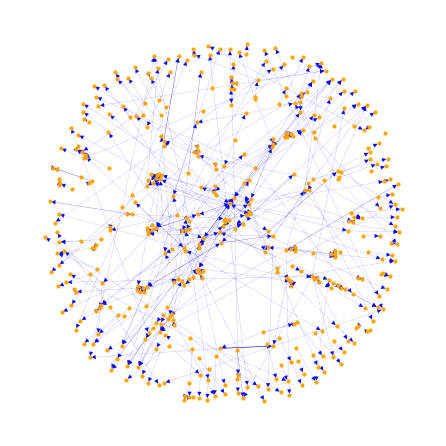

In [74]:
#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph = tripcount_test_df
edge_weight = trips_graph['edge_weight']
wg = nx.DiGraph()
wg.add_weighted_edges_from(edge_weight)
weights = [wg[u][v]['weight'] for u,v in wg.edges()]
myInt = 10
weights[:] = [x / myInt for x in weights]
plt.figure(2,figsize=(6,6))
nx.draw(wg, node_size=10, with_labels=False,node_color='orange', width = weights, edge_color='blue')
plt.show()

### 00:00:00 - 04:00:00 -> Weekend (Sunday)

In [75]:
#Calculate the number of trips for start station to end station
tripcount_test_df1 = df_test_time1_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df1.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df1['edge_weight'] = list(zip(tripcount_test_df1['start_station_name'], tripcount_test_df1['end_station_name'],tripcount_test_df1['Number of Trips']))
tripcount_test_df1.head(5)

,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,Number of Trips,edge_weight
381,Clinton Ave & Flushing Ave,Washington Ave & Park Ave,40.697940,-73.969868,40.696102,-73.967510,5,"(Clinton Ave & Flushing Ave, Washington Ave & ..."
630,E 58 St & 3 Ave,E 58 St & 3 Ave,40.760958,-73.967245,40.760958,-73.967245,4,"(E 58 St & 3 Ave, E 58 St & 3 Ave, 4)"
883,Lafayette St & E 8 St,Division St & Bowery (old),40.730207,-73.991026,40.714131,-73.997047,4,"(Lafayette St & E 8 St, Division St & Bowery (..."
357,Central Park West & W 82 St,E 51 St & 1 Ave,40.782593,-73.971211,40.754557,-73.965930,3,"(Central Park West & W 82 St, E 51 St & 1 Ave, 3)"
1294,W 22 St & 8 Ave,W 22 St & 10 Ave,40.744751,-73.999154,40.746920,-74.004519,3,"(W 22 St & 8 Ave, W 22 St & 10 Ave, 3)"


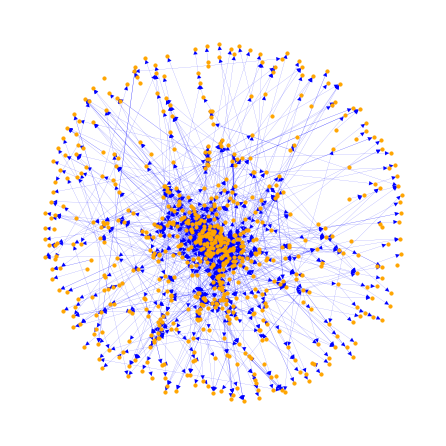

In [76]:
#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph1 = tripcount_test_df1
edge_weight1 = trips_graph1['edge_weight']
wg1 = nx.DiGraph()
wg1.add_weighted_edges_from(edge_weight1)
weights1 = [wg1[u][v]['weight'] for u,v in wg1.edges()]
myInt = 10
weights1[:] = [x / myInt for x in weights1]
plt.figure(2,figsize=(6,6))
nx.draw(wg1, node_size=10, with_labels=False,node_color='orange', width = weights1, edge_color='blue')
plt.show()

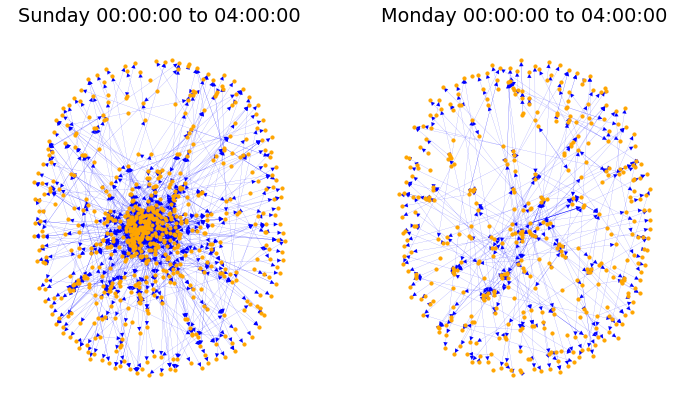

In [77]:
plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 00:00:00 to 04:00:00')
nx.draw(wg1, node_size=10, with_labels=False,node_color='orange', width = weights1, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 00:00:00 to 04:00:00')
nx.draw(wg, node_size=10, with_labels=False,node_color='orange', width = weights, edge_color='blue', ax = ax)

### 04:00:00 - 08:00:00 -> Weekday (Monday) 
### 04:00:00 - 08:00:00 -> Weekend (Sunday)

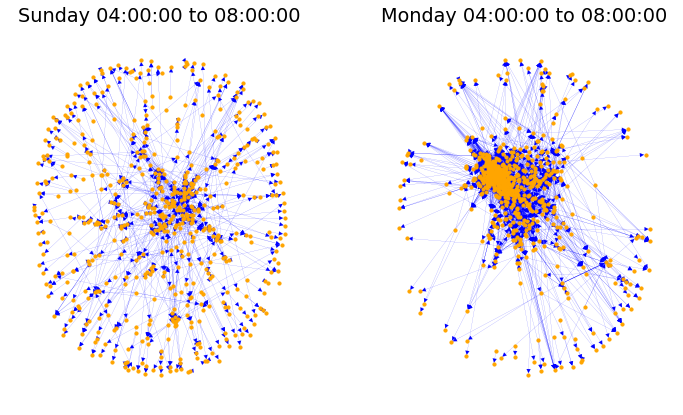

In [78]:
#Calculate the number of trips for start station to end station
tripcount_test_df2 = df_test_time2_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df2.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df2['edge_weight'] = list(zip(tripcount_test_df2['start_station_name'], tripcount_test_df2['end_station_name'],tripcount_test_df2['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph2 = tripcount_test_df2
edge_weight2 = trips_graph2['edge_weight']
wg2 = nx.DiGraph()
wg2.add_weighted_edges_from(edge_weight2)
weights2 = [wg2[u][v]['weight'] for u,v in wg2.edges()]
myInt = 10
weights2[:] = [x / myInt for x in weights2]

#Calculate the number of trips for start station to end station
tripcount_test_df3 = df_test_time2_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df3.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df3['edge_weight'] = list(zip(tripcount_test_df3['start_station_name'], tripcount_test_df3['end_station_name'],tripcount_test_df3['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph3 = tripcount_test_df3
edge_weight3 = trips_graph3['edge_weight']
wg3 = nx.DiGraph()
wg3.add_weighted_edges_from(edge_weight3)
weights3 = [wg3[u][v]['weight'] for u,v in wg3.edges()]
myInt = 10
weights3[:] = [x / myInt for x in weights3]

plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 04:00:00 to 08:00:00')
nx.draw(wg3, node_size=10, with_labels=False,node_color='orange', width = weights3, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 04:00:00 to 08:00:00')
nx.draw(wg2, node_size=10, with_labels=False,node_color='orange', width = weights2, edge_color='blue', ax = ax)

### 08:00:00 - 12:00:00 -> Weekday (Monday)
### 08:00:00 - 12:00:00 -> Weekend (Sunday)

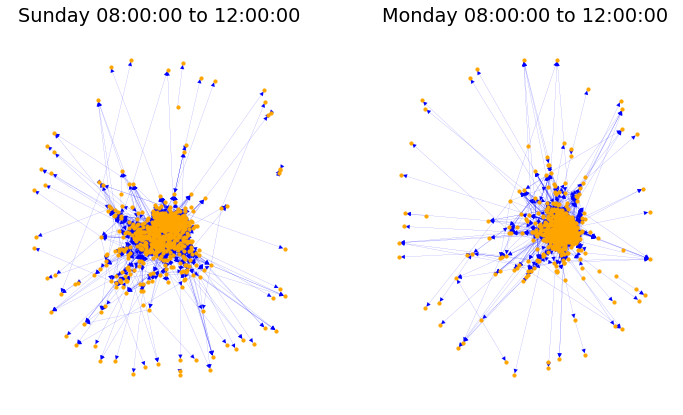

In [79]:
#Calculate the number of trips for start station to end station
tripcount_test_df4 = df_test_time3_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df4.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df4['edge_weight'] = list(zip(tripcount_test_df4['start_station_name'], tripcount_test_df4['end_station_name'],tripcount_test_df4['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph4 = tripcount_test_df4
edge_weight4 = trips_graph4['edge_weight']
wg4 = nx.DiGraph()
wg4.add_weighted_edges_from(edge_weight4)
weights4 = [wg4[u][v]['weight'] for u,v in wg4.edges()]
myInt = 10
weights4[:] = [x / myInt for x in weights4]

#Calculate the number of trips for start station to end station
tripcount_test_df5 = df_test_time3_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df5.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df5['edge_weight'] = list(zip(tripcount_test_df5['start_station_name'], tripcount_test_df5['end_station_name'],tripcount_test_df5['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph5 = tripcount_test_df5
edge_weight5 = trips_graph5['edge_weight']
wg5 = nx.DiGraph()
wg5.add_weighted_edges_from(edge_weight5)
weights5 = [wg5[u][v]['weight'] for u,v in wg5.edges()]
myInt = 10
weights5[:] = [x / myInt for x in weights5]

plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 08:00:00 to 12:00:00')
nx.draw(wg5, node_size=10, with_labels=False,node_color='orange', width = weights5, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 08:00:00 to 12:00:00')
nx.draw(wg4, node_size=10, with_labels=False,node_color='orange', width = weights4, edge_color='blue', ax = ax)

### 12:00:00 - 16:00:00 -> Weekday (Monday)
### 12:00:00 - 16:00:00 -> Weekend (Sunday)

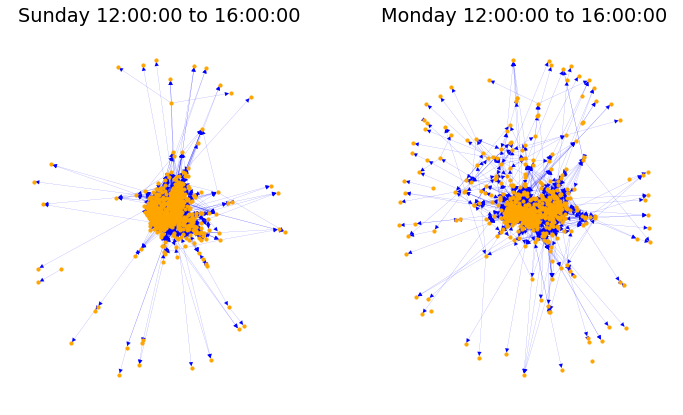

In [80]:
#Calculate the number of trips for start station to end station
tripcount_test_df6 = df_test_time4_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df6.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df6['edge_weight'] = list(zip(tripcount_test_df6['start_station_name'], tripcount_test_df6['end_station_name'],tripcount_test_df6['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph6 = tripcount_test_df6
edge_weight6 = trips_graph6['edge_weight']
wg6 = nx.DiGraph()
wg6.add_weighted_edges_from(edge_weight6)
weights6 = [wg6[u][v]['weight'] for u,v in wg6.edges()]
myInt = 10
weights6[:] = [x / myInt for x in weights6]

#Calculate the number of trips for start station to end station
tripcount_test_df7 = df_test_time4_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df7.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df7['edge_weight'] = list(zip(tripcount_test_df7['start_station_name'], tripcount_test_df7['end_station_name'],tripcount_test_df7['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph7 = tripcount_test_df7
edge_weight7 = trips_graph7['edge_weight']
wg7 = nx.DiGraph()
wg7.add_weighted_edges_from(edge_weight7)
weights7 = [wg7[u][v]['weight'] for u,v in wg7.edges()]
myInt = 10
weights7[:] = [x / myInt for x in weights7]

plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 12:00:00 to 16:00:00')
nx.draw(wg7, node_size=10, with_labels=False,node_color='orange', width = weights7, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 12:00:00 to 16:00:00')
nx.draw(wg6, node_size=10, with_labels=False,node_color='orange', width = weights6, edge_color='blue', ax = ax)

### 16:00:00 - 20:00:00 -> Weekday (Monday)
### 16:00:00 - 20:00:00 -> Weekend (Sunday)

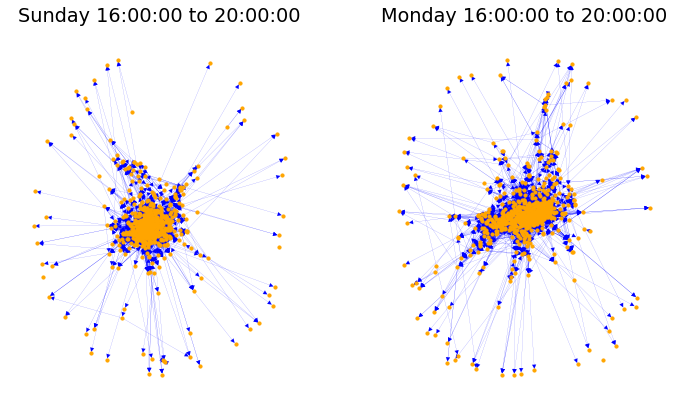

In [81]:
#Calculate the number of trips for start station to end station
tripcount_test_df8 = df_test_time5_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df8.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df8['edge_weight'] = list(zip(tripcount_test_df8['start_station_name'], tripcount_test_df8['end_station_name'],tripcount_test_df8['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph8 = tripcount_test_df8
edge_weight8 = trips_graph8['edge_weight']
wg8 = nx.DiGraph()
wg8.add_weighted_edges_from(edge_weight8)
weights8 = [wg8[u][v]['weight'] for u,v in wg8.edges()]
myInt = 10
weights8[:] = [x / myInt for x in weights8]

#Calculate the number of trips for start station to end station
tripcount_test_df9 = df_test_time5_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df9.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df9['edge_weight'] = list(zip(tripcount_test_df9['start_station_name'], tripcount_test_df9['end_station_name'],tripcount_test_df9['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph9 = tripcount_test_df9
edge_weight9 = trips_graph9['edge_weight']
wg9 = nx.DiGraph()
wg9.add_weighted_edges_from(edge_weight9)
weights9 = [wg9[u][v]['weight'] for u,v in wg9.edges()]
myInt = 10
weights9[:] = [x / myInt for x in weights9]

plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 16:00:00 to 20:00:00')
nx.draw(wg9, node_size=10, with_labels=False,node_color='orange', width = weights9, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 16:00:00 to 20:00:00')
nx.draw(wg8, node_size=10, with_labels=False,node_color='orange', width = weights8, edge_color='blue', ax = ax)

### 20:00:00 - 24:00:00 -> Weekday (Monday)
### 20:00:00 - 24:00:00 -> Weekend (Sunday)

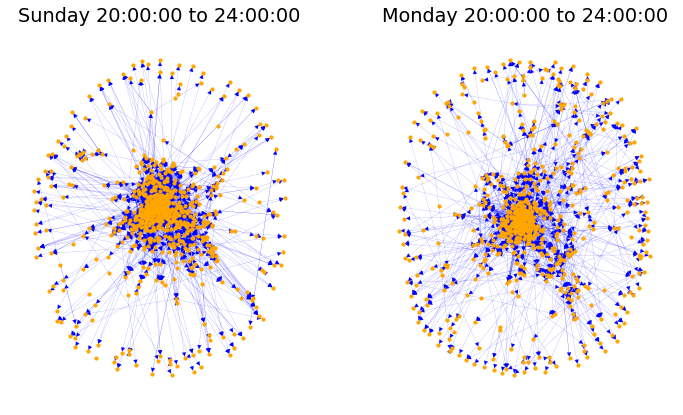

In [82]:
#Calculate the number of trips for start station to end station
tripcount_test_df10 = df_test_time6_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df10.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df10['edge_weight'] = list(zip(tripcount_test_df10['start_station_name'], tripcount_test_df10['end_station_name'],tripcount_test_df10['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph10 = tripcount_test_df10
edge_weight10 = trips_graph10['edge_weight']
wg10 = nx.DiGraph()
wg10.add_weighted_edges_from(edge_weight10)
weights10 = [wg10[u][v]['weight'] for u,v in wg10.edges()]
myInt = 10
weights10[:] = [x / myInt for x in weights10]

#Calculate the number of trips for start station to end station
tripcount_test_df11 = df_test_time6_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df11.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df11['edge_weight'] = list(zip(tripcount_test_df11['start_station_name'], tripcount_test_df11['end_station_name'],tripcount_test_df11['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph11 = tripcount_test_df11
edge_weight11 = trips_graph11['edge_weight']
wg11 = nx.DiGraph()
wg11.add_weighted_edges_from(edge_weight11)
weights11 = [wg11[u][v]['weight'] for u,v in wg11.edges()]
myInt = 10
weights11[:] = [x / myInt for x in weights11]

plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 20:00:00 to 24:00:00')
nx.draw(wg11, node_size=10, with_labels=False,node_color='orange', width = weights11, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 20:00:00 to 24:00:00')
nx.draw(wg10, node_size=10, with_labels=False,node_color='orange', width = weights10, edge_color='blue', ax = ax)

In [83]:
#Calculate the number of trips for start station to end station
tripcount_df = df.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_df.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_df['edge_weight'] = list(zip(tripcount_df['start_station_name'], tripcount_df['end_station_name'],tripcount_df['Number of Trips']))
tripcount_df.head(5)

,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,Number of Trips,edge_weight
32823,E 7 St & Avenue A,Cooper Square & Astor Pl,40.726218,-73.983799,40.729515,-73.990753,109,"(E 7 St & Avenue A, Cooper Square & Astor Pl, ..."
15043,Broadway & W 60 St,11 Ave & W 59 St,40.769155,-73.981918,40.771497,-73.990460,96,"(Broadway & W 60 St, 11 Ave & W 59 St, 96)"
27588,E 32 St & Park Ave,E 33 St & 1 Ave,40.745712,-73.981948,40.743227,-73.974498,90,"(E 32 St & Park Ave, E 33 St & 1 Ave, 90)"
59670,W 21 St & 6 Ave,9 Ave & W 22 St,40.741740,-73.994156,40.745497,-74.001971,87,"(W 21 St & 6 Ave, 9 Ave & W 22 St, 87)"
1919,11 Ave & W 41 St,8 Ave & W 33 St,40.760301,-73.998842,40.751551,-73.993934,77,"(11 Ave & W 41 St, 8 Ave & W 33 St, 77)"


### Network Structure for Month of Dec 2019

In [84]:
#Construct an undirected network graph based on the above edges
import networkx as nx
trips_graph = tripcount_df
edge_weight = trips_graph['edge_weight']
wg = nx.DiGraph()
wg.add_weighted_edges_from(edge_weight)

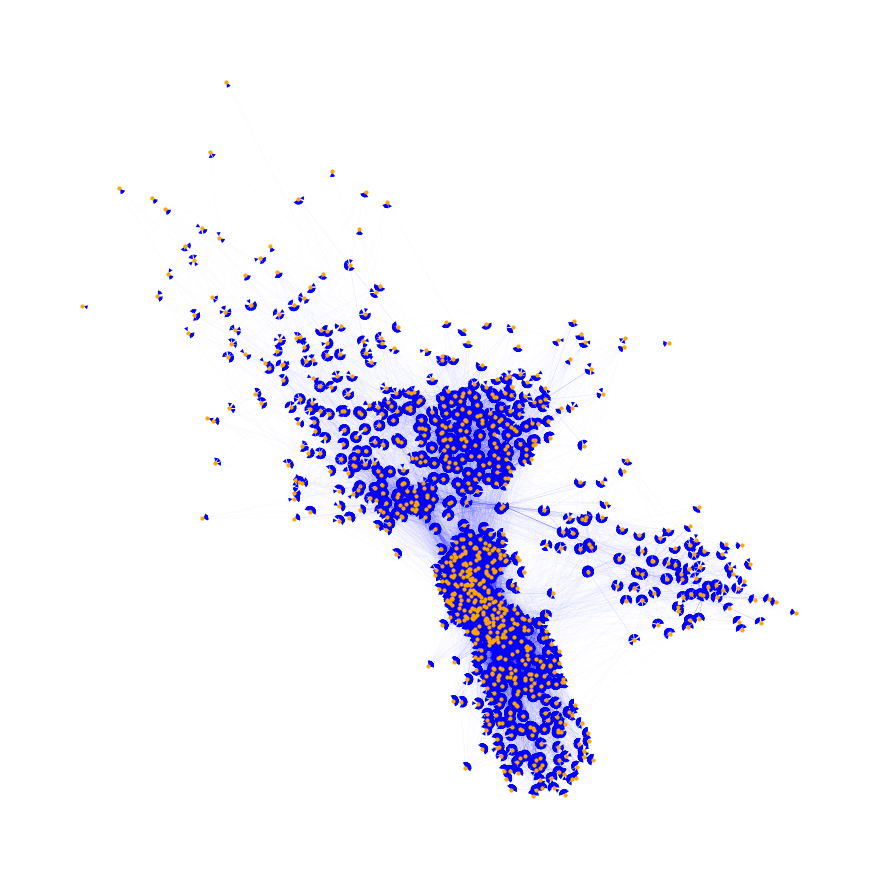

In [85]:
weights = [wg[u][v]['weight'] for u,v in wg.edges()]
myInt = 300
weights[:] = [x / myInt for x in weights]
plt.figure(3,figsize=(12,12))
nx.draw(wg, node_size=10, with_labels=False,node_color='orange', width = weights, edge_color='blue')
plt.show()

### Having Completed EDA & Plotting Basic Network Graphs using networkx packpage, we save our data sets for the 6 seperate time frames into '.CSV' files for community detection and centrality metrics calculation

In [86]:
# df_test_time1_wk to df_test_time6_wk - 6 time slots of the week are stored as .CSV files
df_test_time1_wk.to_csv('Clean_data_files_for_Community/time1_wk.csv')
df_test_time2_wk.to_csv('Clean_data_files_for_Community/time2_wk.csv')
df_test_time3_wk.to_csv('Clean_data_files_for_Community/time3_wk.csv')
df_test_time4_wk.to_csv('Clean_data_files_for_Community/time4_wk.csv')
df_test_time5_wk.to_csv('Clean_data_files_for_Community/time5_wk.csv')
df_test_time6_wk.to_csv('Clean_data_files_for_Community/time6_wk.csv')

# df_test_time1_wkend to df_test_time6_wkend - 6 time slots of the weekend are stored as .CSV files
df_test_time1_wkend.to_csv('Clean_data_files_for_Community/time1_wkend.csv')
df_test_time2_wkend.to_csv('Clean_data_files_for_Community/time2_wkend.csv')
df_test_time3_wkend.to_csv('Clean_data_files_for_Community/time3_wkend.csv')
df_test_time4_wkend.to_csv('Clean_data_files_for_Community/time4_wkend.csv')
df_test_time5_wkend.to_csv('Clean_data_files_for_Community/time5_wkend.csv')
df_test_time6_wkend.to_csv('Clean_data_files_for_Community/time6_wkend.csv')